In [1]:
#!pip install pyLDAvis
#!pip install mallet
#!pip install gensim

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
import mallet
import os
import re
import nltk

In [106]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from pprint import pprint

In [17]:
df=pd.read_csv('../Data/Twitter_english.csv')

In [125]:
pd.set_option('display.max_colwidth',50)
pd.set_option('display.max_row', 100)

## Preprocessing

In [98]:
df.shape

(832924, 7)

In [19]:
df = df.drop('Language', axis=1)

In [20]:
#Remove URL from tweet text
df['Text'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+', '',x))
#Remove mention (@user)
df['Text'] = df['Text'].apply(lambda x: re.sub(r'@\S+', '',x))
#All lowercases
df['Text'] = df['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
#Remove Punctuation
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [21]:
#Replace 'chat gpt' with 'chatgpt'
df['Text'] = df['Text'].apply(lambda x: re.sub(r'chat gpt', 'chatgpt', x))

In [22]:
#remove stopwords, short tokens, and accents
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)
#simple_preprocess: Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.
df['Token'] = df['Text'].apply(lambda x: [word for word in simple_preprocess(x) if word not in stopwords])

In [430]:
df_test = df[0:20000].copy()

In [99]:
#Build the bigram and trigrams
bigram = Phrases(df['Token'], min_count=100, threshold=100)
# #bigram[df['Token']] will apply the bigram object to each row of the df['Token'] column
df['Bigram'] = bigram[df['Token']]
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [100]:
trigram = Phrases(df['Bigram'], min_count=100, threshold=100)
df['Trigram'] = trigram[df['Bigram']]
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [101]:
df[df['Trigram']!=df['Bigram']][0:50]

,UserName,Tweet,Date,Text,Token,Bigram,Trigram
4,datos_digital,ChatGPT Is Making Universities Rethink Plagiarism : #analytics #googleads #facebookads https://t.co/rmIOAn2A0U,2023-01-30,chatgpt is making universities rethink plagiarism analytics googleads facebookads,"[chatgpt, making, universities, rethink, plagiarism, analytics, googleads, facebookads]","[chatgpt, making, universities, rethink, plagiarism, analytics_googleads, facebookads]","[chatgpt, making, universities, rethink, plagiarism, analytics_googleads_facebookads]"
33,MrsDi,"#ChatGPT: Helping Students Learn, Saving Teachers Time, and Why Now\n(w/me, @johnmayo &amp; @rushtonh )\n#ISTE WEBINAR this Fri, 2/3 - 3:00 pm ET\nRegister for this ISTE Community Meetup https://t.co/I6LiwLk42I\nShare this link with others...ISTE Meetups are open to all! https://t.co/Rii1ZsZ4NL",2023-01-30,chatgpt helping students learn saving teachers time and why now wme amp iste webinar this fri 23 300 pm et register for this iste community meetup share this link with othersiste meetups are open to all,"[chatgpt, helping, students, learn, saving, teachers, time, wme, amp, iste, webinar, fri, pm, et, register, iste, community, meetup, share, link, othersiste, meetups, open]","[chatgpt, helping, students, learn, saving, teachers, time, wme, amp, iste, webinar, fri, pm, et, register, iste, community, meetup, share, link, othersiste, meetups, open]","[chatgpt, helping, students, learn, saving, teachers, time, wme, amp, iste, webinar, fri, pm_et, register, iste, community, meetup, share, link, othersiste, meetups, open]"
59,nicolas760,China's Baidu to launch ChatGPT-style bot in March - source | Reuters https://t.co/3oWpvbFjCp,2023-01-30,chinas baidu to launch chatgptstyle bot in march source reuters,"[chinas, baidu, launch, chatgptstyle, bot, march, source, reuters]","[chinas_baidu, launch_chatgptstyle, bot, march, source, reuters]","[chinas_baidu_launch_chatgptstyle, bot, march, source, reuters]"
105,LuisGM_MMQT,ChatGPT: Optimizing Language Models for Dialogue - AI machine… https://t.co/mFhqRDiUPi,2023-01-30,chatgpt optimizing language models for dialogue ai machine,"[chatgpt, optimizing, language, models, dialogue, ai, machine]","[chatgpt, optimizing, language, models, dialogue, ai, machine]","[chatgpt, optimizing_language, models, dialogue, ai, machine]"
385,tdharveyphoto,@nanook_eth @Crypto_Coffee @inversebrah Wait seriously? I knew the origin of inversebrah and chatgpt doesn't? I think that means I just passed the medical licensing exam,2023-01-30,wait seriously i knew the origin of inversebrah and chatgpt doesnt i think that means i just passed the medical licensing exam,"[wait, seriously, knew, origin, inversebrah, chatgpt, doesnt, think, means, passed, medical, licensing, exam]","[wait, seriously, knew, origin, inversebrah, chatgpt, doesnt, think, means, passed, medical_licensing, exam]","[wait, seriously, knew, origin, inversebrah, chatgpt, doesnt, think, means, passed, medical_licensing_exam]"
422,ben_levinstein,I wrote the first two parts of a series on how large language models like ChatGPT work aimed at philosophers and others who don't have much background in machine learning.\n\nHere's Part I. \n\nhttps://t.co/sJR97Ft7MA,2023-01-30,i wrote the first two parts of a series on how large language models like chatgpt work aimed at philosophers and others who dont have much background in machine learning heres part i,"[wrote, first, two, parts, series, large, language, models, like, chatgpt, work, aimed, philosophers, others, dont, much, background, machine, learning, heres, part]","[wrote, first, two, parts, series, large, language, models, like, chatgpt, work, aimed, philosophers, others, dont, much, background, machine, learning, heres, part]","[wrote, first, two, parts, series, large_language, models, like, chatgpt, work, aimed, philosophers, others, dont, much, background, machine, learning, heres, part]"
501,saadnajeebsaad,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunrise #Sunset

In [102]:
# Get the bigram and trigram phrases
biphrase = bigram.export_phrases()
triphrase = trigram.export_phrases()
print(f'Bi:{len(biphrase)}, Tri:{len(triphrase)}')

Bi:429, Tri:487


In [103]:
biphrase, triphrase

({'analytics_googleads': 347.785760578418,
  'googleads_facebookads': 4856.318805064473,
  'gmail_creator': 203.27676793766037,
  'bar_exam': 178.4815084233922,
  'chinas_baidu': 802.360261288133,
  'baidu_launch': 215.3519357425076,
  'launch_chatgptstyle': 283.6835470250276,
  'stack_overflow': 1279.4464354504498,
  'turing_test': 348.91708970414203,
  'artificial_intelligence': 199.8297883420495,
  'continue_reading': 193.0908873010495,
  'blown_away': 349.5707883447546,
  'donald_trump': 1769.3510013150071,
  'nick_cave': 1738.922695637413,
  'github_copilot': 369.64434411155776,
  'social_media': 359.8131773228692,
  'neural_network': 505.7568889693189,
  'wolf_door': 2157.97749883775,
  'white_collar': 1253.218464570133,
  'lesson_plans': 108.3224759402058,
  'sam_altman': 1881.01381641169,
  'elon_musk': 654.768713856492,
  'computer_science': 103.4475179358992,
  'via_rtechnology': 107.36357225152156,
  'invest_billion': 164.8153962966418,
  'customer_service': 240.426762799879

In [104]:
# Get the bigram and trigram vocabularies
bigram_vocab = bigram.vocab
trigram_vocab = trigram.vocab

# Sort the bigram and trigram vocabularies by frequency in descending order
sorted_bigram_vocab = sorted(biphrase.items(), key=lambda x: x[1], reverse=True)
sorted_trigram_vocab = sorted(triphrase.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 most common bigrams and trigrams
print("Top 20 most common bigrams:")
for phrase, freq in sorted_bigram_vocab[:20]:
    print("{}: {}".format(phrase, freq))

print("\nTop 20 most common trigrams:")
for phrase, freq in sorted_trigram_vocab[:20]:
    print("{}: {}".format(phrase, freq))

Top 20 most common bigrams:
khisunrise_khisunset: 7970.513354459032
khi_tempupdate: 7025.334664777873
grotesque_mockery: 6794.159300873908
granola_machinedriven: 6579.962262528273
weatherupdate_karachi: 6501.707236347224
ramsey_elbasheer: 6395.591025618359
karachi_khi: 6305.34695068573
temp_humidity: 6067.955791796209
machinedriven_rss: 5908.186010594758
fossil_fuels: 5451.041486068112
tempupdate_khisunrise: 5184.970625046014
khisunset_hourlyupdate: 5184.970625046014
hourlyupdate_sunrise: 4937.6172879806745
marketbeating_etf: 4905.349501994663
googleads_facebookads: 4856.318805064473
sunrise_sunset: 4660.957836371615
humidity_wind: 4527.525513525648
kindle_novelists: 4497.926308063333
sergey_brin: 4259.444584000045
destabilize_whitecollar: 4239.997506856145

Top 20 most common trigrams:
humidity_wind_speed_kmhr: 50731569.0
grotesque_mockery: 2070676.285714286
humidity_wind: 618677.6707317074
marketbeating_etf: 498189.37600000005
lorem_ipsum: 470914.03508771927
san_francisco: 451175.723

In [440]:
# bi-gram and tri-gram implementation
start_time = time.time()
df['Token'] = df['Token'].apply(lambda x:bigram_mod[x])
end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken1: {total_time:.2f} seconds")

start_time = time.time()
df['Token']= df['Token'].apply(lambda x:trigram_mod[bigram_mod[x]])
end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken2: {total_time:.2f} seconds")

In [450]:
#Lemmatization
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#define a function to map POS tags from treebank tag into wordnet tags
wnl = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'): 
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN     #default to noun if no match

    
# Define a function to tag and lemmatize a text string    
def lemmatizer(text):
    pos_tags = pos_tag(text)
    text = [wnl.lemmatize(word, pos = get_wordnet(pos)) for word, pos in pos_tags]
    return text

start_time = time.time()

df['Lemmatized'] = df['Token'].apply(lambda x: lemmatizer(x))

end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

In [460]:
# remove stopwords and short tokens again after lemmatization
df['Text_new'] = df['Lemmatized'].apply(lambda x: ' '.join(x))
df['Tokens'] = df['Text_new'].apply(lambda x: [word for word in simple_preprocess(x, deacc=True, min_len=3, max_len=50) if word not in stopwords])

In [467]:
df_1 = df.copy()

In [470]:
#df = df.drop(columns =['Text', 'Token', 'Lemmatized', 'Text_new'])
df.to_csv('Twitter_english_clean.csv',index=False)

## Create the Dictionary and Corpus

In [113]:
df = pd.read_csv('../Data/Twitter_english_clean.csv')

In [114]:
import ast
# # convert the string of words in the 'Tweet_lemmatized' column to a list for each row in the dataframe
df['Tokens'] = df['Tokens'].apply(lambda x: ast.literal_eval(x))

In [115]:
dictionary = Dictionary(df['Tokens'])
print(f'Total vocabulary size: {len(dictionary)}')

Total vocabulary size: 170187


In [8]:
corpus = [dictionary.doc2bow(doc) for doc in df['Tokens']]

In [9]:
#create a dictionary to show the word and frequency in the corpus
dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if dictionary[idx] in dict_corpus:
            dict_corpus[dictionary[idx]] += freq
        else: 
            dict_corpus[dictionary[idx]] = freq
df_dict = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['frequency'])

In [10]:
# Top 10 high-frequency words 
df_dict.sort_values('frequency', ascending = False).head(20)

,frequency
chatgpt,892296
use,131805
write,90331
ask,73863
like,67908
get,59665
make,57584
google,48632
openai,47981
think,44679


In [116]:
# Filter extreme words
dictionary.filter_extremes(no_below=10, no_above=0.5)  #words occur in less than 10 tweets, or more than 50% of tweets
print(f'Total vocabulary size: {len(dictionary)}')

Total vocabulary size: 22124


In [117]:
# Recreate the corpus for LDA model
corpus = [dictionary.doc2bow(doc) for doc in df['Tokens']]

In [13]:
# Re-check the top words
dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if dictionary[idx] in dict_corpus:
            dict_corpus[dictionary[idx]] += freq
        else: 
            dict_corpus[dictionary[idx]] = freq
df_dict_new = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['frequency'])
df_dict_new.sort_values('frequency', ascending = False).head(20)

,frequency
use,131805
write,90331
ask,73863
like,67908
get,59665
make,57584
google,48632
openai,47981
think,44679
new,39584


In [14]:
# Generate a test corpus
corpus_test = [dictionary.doc2bow(doc) for doc in df['Tokens'][0:1000]]

In [118]:
len(corpus),len(dictionary)

(832924, 22124)

## LDA Model Implementation

In [11]:
import time
import logging
from tqdm import tqdm

In [11]:
num_topics = 10
passes = 10
total_iteration = num_topics*passes

In [19]:
start_time =time.time()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# train the LdaModel
lda_model = LdaModel(corpus=corpus_test, id2word=dictionary, num_topics=num_topics, passes=passes)

end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

2023-02-27 13:23:19,256 : INFO : using symmetric alpha at 0.1
2023-02-27 13:23:19,257 : INFO : using symmetric eta at 0.1
2023-02-27 13:23:19,260 : INFO : using serial LDA version on this node
2023-02-27 13:23:19,291 : INFO : running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 1000 documents, updating model once every 1000 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-27 13:23:19,599 : INFO : -37.303 per-word bound, 169601645488.2 perplexity estimate based on a held-out corpus of 1000 documents with 9359 words
2023-02-27 13:23:19,600 : INFO : PROGRESS: pass 0, at document #1000/1000
2023-02-27 13:23:19,857 : INFO : topic #4 (0.100): 0.006*"google" + 0.006*"business" + 0.005*"say" + 0.005*"write" + 0.005*"could" + 0.004*"year" + 0.004*"two" + 0.003*"gmail_creator" + 0.003*"destroy" + 0.003*"use"
2023-02-27 13:23:19,857 : INFO : topic #8 (0.100): 0.007*"use" + 0.004*"work" + 0.0

2023-02-27 13:23:21,280 : INFO : topic diff=0.005922, rho=0.377964
2023-02-27 13:23:21,436 : INFO : -9.383 per-word bound, 667.8 perplexity estimate based on a held-out corpus of 1000 documents with 9359 words
2023-02-27 13:23:21,436 : INFO : PROGRESS: pass 6, at document #1000/1000
2023-02-27 13:23:21,546 : INFO : topic #1 (0.100): 0.007*"use" + 0.007*"write" + 0.006*"make" + 0.005*"well" + 0.004*"like" + 0.004*"ask" + 0.003*"plagiarism" + 0.003*"one" + 0.003*"time" + 0.003*"work"
2023-02-27 13:23:21,547 : INFO : topic #6 (0.100): 0.009*"make" + 0.008*"ask" + 0.005*"answer" + 0.005*"use" + 0.004*"google" + 0.004*"look" + 0.003*"like" + 0.003*"bot" + 0.003*"data" + 0.003*"source"
2023-02-27 13:23:21,547 : INFO : topic #4 (0.100): 0.009*"business" + 0.008*"google" + 0.006*"say" + 0.006*"year" + 0.005*"could" + 0.005*"two" + 0.005*"gmail_creator" + 0.005*"destroy" + 0.004*"write" + 0.003*"within"
2023-02-27 13:23:21,548 : INFO : topic #0 (0.100): 0.005*"think" + 0.003*"say" + 0.003*"like

Total time taken: 3.13 seconds


In [20]:
# Display topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('think', 0.0052540307),
   ('say', 0.0033945332),
   ('like', 0.003340129),
   ('see', 0.0032358451),
   ('make', 0.0027603933),
   ('new', 0.0024784594),
   ('dont', 0.0024740063),
   ('panic', 0.002473049),
   ('professor', 0.002473044),
   ('bullshit', 0.0024680381)]),
 (1,
  [('use', 0.0070700557),
   ('write', 0.006813568),
   ('make', 0.006617673),
   ('well', 0.004874938),
   ('like', 0.0042669075),
   ('ask', 0.003752992),
   ('plagiarism', 0.0030616194),
   ('one', 0.0030401913),
   ('even', 0.0029824162),
   ('time', 0.0029517459)]),
 (2,
  [('like', 0.0048722653),
   ('write', 0.004492349),
   ('use', 0.0039564837),
   ('today', 0.0023596562),
   ('amp', 0.0020551954),
   ('ask', 0.0020534198),
   ('give', 0.001871563),
   ('everything', 0.0017702585),
   ('deep', 0.0017152011),
   ('feel', 0.0017105511)]),
 (3,
  [('use', 0.008320246),
   ('write', 0.007701895),
   ('get', 0.0075990865),
   ('know', 0.0052802064),
   ('since', 0.0047551626),
   ('artificial_intelli

In [21]:
#Compute Coherence Score
cm = CoherenceModel(model=lda_model, corpus = corpus, coherence='c_v', texts=df['Tokens'])
coherence = cm.get_coherence()

2023-02-27 13:29:39,409 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows
2023-02-27 13:30:25,243 : INFO : 15 accumulators retrieved from output queue
2023-02-27 13:30:25,287 : INFO : accumulated word occurrence stats for 677071 virtual documents


In [22]:
print(f'Coherence score: {coherence}')

Coherence score: 0.2975901574463965


In [23]:
# To increase the speed, use a multicore Lda model
from gensim.models.ldamulticore import LdaMulticore
start_time =time.time()
#Train the LdaMulticore model
lda_model_m = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, workers=10)

end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

2023-02-27 13:31:09,938 : INFO : using symmetric alpha at 0.1
2023-02-27 13:31:09,939 : INFO : using symmetric eta at 0.1
2023-02-27 13:31:09,941 : INFO : using serial LDA version on this node
2023-02-27 13:31:09,958 : INFO : running online LDA training, 10 topics, 10 passes over the supplied corpus of 832924 documents, updating every 20000 documents, evaluating every ~200000 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-27 13:31:09,959 : INFO : training LDA model using 10 processes
2023-02-27 13:31:33,850 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/832924, outstanding queue size 1
2023-02-27 13:31:33,854 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/832924, outstanding queue size 2
2023-02-27 13:31:33,857 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/832924, outstanding queue size 3
2023-02-27 13:31:33,862 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/83292

2023-02-27 13:31:35,702 : INFO : topic #0 (0.100): 0.017*"use" + 0.012*"write" + 0.010*"like" + 0.010*"make" + 0.007*"model" + 0.007*"ask" + 0.006*"content" + 0.006*"openai" + 0.006*"get" + 0.006*"tool"
2023-02-27 13:31:35,703 : INFO : topic #9 (0.100): 0.009*"new" + 0.007*"human" + 0.007*"get" + 0.006*"bot" + 0.006*"even" + 0.006*"say" + 0.006*"make" + 0.005*"use" + 0.005*"tool" + 0.005*"one"
2023-02-27 13:31:35,704 : INFO : topic #4 (0.100): 0.011*"google" + 0.010*"openai" + 0.008*"use" + 0.007*"say" + 0.007*"take" + 0.006*"amp" + 0.006*"tool" + 0.006*"write" + 0.006*"make" + 0.005*"ask"
2023-02-27 13:31:35,705 : INFO : topic #8 (0.100): 0.010*"write" + 0.009*"use" + 0.009*"like" + 0.009*"google" + 0.008*"work" + 0.008*"could" + 0.008*"make" + 0.007*"people" + 0.007*"student" + 0.007*"ask"
2023-02-27 13:31:35,705 : INFO : topic diff=1.199861, rho=0.301511
2023-02-27 13:31:35,707 : INFO : PROGRESS: pass 0, dispatched chunk #49 = documents up to #100000/832924, outstanding queue size 3

2023-02-27 13:31:38,044 : INFO : topic diff=0.058953, rho=0.156174
2023-02-27 13:31:38,044 : INFO : PROGRESS: pass 0, dispatched chunk #79 = documents up to #160000/832924, outstanding queue size 30
2023-02-27 13:31:38,223 : INFO : PROGRESS: pass 0, dispatched chunk #80 = documents up to #162000/832924, outstanding queue size 30
2023-02-27 13:31:38,390 : INFO : PROGRESS: pass 0, dispatched chunk #81 = documents up to #164000/832924, outstanding queue size 30
2023-02-27 13:31:38,463 : INFO : PROGRESS: pass 0, dispatched chunk #82 = documents up to #166000/832924, outstanding queue size 30
2023-02-27 13:31:38,569 : INFO : PROGRESS: pass 0, dispatched chunk #83 = documents up to #168000/832924, outstanding queue size 30
2023-02-27 13:31:38,586 : INFO : PROGRESS: pass 0, dispatched chunk #84 = documents up to #170000/832924, outstanding queue size 29
2023-02-27 13:31:38,588 : INFO : PROGRESS: pass 0, dispatched chunk #85 = documents up to #172000/832924, outstanding queue size 30
2023-02-2

2023-02-27 13:31:40,965 : INFO : PROGRESS: pass 0, dispatched chunk #114 = documents up to #230000/832924, outstanding queue size 30
2023-02-27 13:31:40,990 : INFO : PROGRESS: pass 0, dispatched chunk #115 = documents up to #232000/832924, outstanding queue size 29
2023-02-27 13:31:40,991 : INFO : PROGRESS: pass 0, dispatched chunk #116 = documents up to #234000/832924, outstanding queue size 30
2023-02-27 13:31:41,057 : INFO : PROGRESS: pass 0, dispatched chunk #117 = documents up to #236000/832924, outstanding queue size 30
2023-02-27 13:31:41,137 : INFO : PROGRESS: pass 0, dispatched chunk #118 = documents up to #238000/832924, outstanding queue size 30
2023-02-27 13:31:41,263 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:31:41,272 : INFO : topic #8 (0.100): 0.015*"exam" + 0.011*"pass" + 0.010*"use" + 0.010*"write" + 0.009*"student" + 0.009*"like" + 0.009*"google" + 0.009*"could" + 0.008*"people" + 0.008*"work"
2023-02-27 13:31:41,273 :

2023-02-27 13:31:43,372 : INFO : PROGRESS: pass 0, dispatched chunk #148 = documents up to #298000/832924, outstanding queue size 30
2023-02-27 13:31:43,507 : INFO : PROGRESS: pass 0, dispatched chunk #149 = documents up to #300000/832924, outstanding queue size 30
2023-02-27 13:31:43,598 : INFO : PROGRESS: pass 0, dispatched chunk #150 = documents up to #302000/832924, outstanding queue size 30
2023-02-27 13:31:43,811 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:31:43,818 : INFO : topic #9 (0.100): 0.009*"new" + 0.008*"human" + 0.008*"get" + 0.007*"say" + 0.006*"future" + 0.006*"even" + 0.005*"mean" + 0.005*"amp" + 0.005*"good" + 0.005*"one"
2023-02-27 13:31:43,820 : INFO : topic #1 (0.100): 0.024*"use" + 0.022*"openai" + 0.010*"microsoft" + 0.009*"write" + 0.008*"learn" + 0.008*"new" + 0.007*"help" + 0.007*"prompt" + 0.006*"via" + 0.006*"see"
2023-02-27 13:31:43,821 : INFO : topic #2 (0.100): 0.021*"use" + 0.009*"one" + 0.008*"question"

2023-02-27 13:31:46,039 : INFO : topic #9 (0.100): 0.010*"new" + 0.008*"human" + 0.008*"get" + 0.007*"say" + 0.006*"future" + 0.006*"even" + 0.005*"mean" + 0.005*"talk" + 0.005*"amp" + 0.005*"one"
2023-02-27 13:31:46,040 : INFO : topic #2 (0.100): 0.021*"use" + 0.009*"one" + 0.009*"question" + 0.008*"write" + 0.007*"world" + 0.007*"ask" + 0.007*"answer" + 0.007*"get" + 0.006*"change" + 0.006*"create"
2023-02-27 13:31:46,041 : INFO : topic #1 (0.100): 0.024*"use" + 0.024*"openai" + 0.013*"microsoft" + 0.009*"write" + 0.009*"new" + 0.008*"learn" + 0.008*"help" + 0.007*"prompt" + 0.007*"via" + 0.006*"see"
2023-02-27 13:31:46,042 : INFO : topic #8 (0.100): 0.013*"exam" + 0.012*"student" + 0.011*"use" + 0.010*"write" + 0.009*"pass" + 0.009*"like" + 0.009*"could" + 0.008*"google" + 0.008*"people" + 0.008*"work"
2023-02-27 13:31:46,044 : INFO : topic diff=0.033411, rho=0.083624
2023-02-27 13:31:46,044 : INFO : PROGRESS: pass 0, dispatched chunk #181 = documents up to #364000/832924, outstandi

2023-02-27 13:31:48,319 : INFO : topic diff=0.030950, rho=0.076029
2023-02-27 13:31:48,319 : INFO : PROGRESS: pass 0, dispatched chunk #211 = documents up to #424000/832924, outstanding queue size 30
2023-02-27 13:31:48,353 : INFO : PROGRESS: pass 0, dispatched chunk #212 = documents up to #426000/832924, outstanding queue size 30
2023-02-27 13:31:48,394 : INFO : PROGRESS: pass 0, dispatched chunk #213 = documents up to #428000/832924, outstanding queue size 30
2023-02-27 13:31:48,456 : INFO : PROGRESS: pass 0, dispatched chunk #214 = documents up to #430000/832924, outstanding queue size 30
2023-02-27 13:31:48,588 : INFO : PROGRESS: pass 0, dispatched chunk #215 = documents up to #432000/832924, outstanding queue size 28
2023-02-27 13:31:48,589 : INFO : PROGRESS: pass 0, dispatched chunk #216 = documents up to #434000/832924, outstanding queue size 29
2023-02-27 13:31:48,590 : INFO : PROGRESS: pass 0, dispatched chunk #217 = documents up to #436000/832924, outstanding queue size 30
20

2023-02-27 13:31:50,532 : INFO : PROGRESS: pass 0, dispatched chunk #246 = documents up to #494000/832924, outstanding queue size 30
2023-02-27 13:31:50,560 : INFO : PROGRESS: pass 0, dispatched chunk #247 = documents up to #496000/832924, outstanding queue size 30
2023-02-27 13:31:50,771 : INFO : PROGRESS: pass 0, dispatched chunk #248 = documents up to #498000/832924, outstanding queue size 28
2023-02-27 13:31:50,772 : INFO : PROGRESS: pass 0, dispatched chunk #249 = documents up to #500000/832924, outstanding queue size 29
2023-02-27 13:31:50,773 : INFO : PROGRESS: pass 0, dispatched chunk #250 = documents up to #502000/832924, outstanding queue size 30
2023-02-27 13:31:51,009 : INFO : PROGRESS: pass 0, dispatched chunk #251 = documents up to #504000/832924, outstanding queue size 30
2023-02-27 13:31:51,110 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:31:51,119 : INFO : topic #9 (0.100): 0.010*"new" + 0.008*"human" + 0.007*"get" + 0.00

2023-02-27 13:31:53,300 : INFO : PROGRESS: pass 0, dispatched chunk #281 = documents up to #564000/832924, outstanding queue size 30
2023-02-27 13:31:53,359 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:31:53,370 : INFO : topic #8 (0.100): 0.017*"student" + 0.012*"write" + 0.011*"use" + 0.009*"exam" + 0.009*"like" + 0.009*"could" + 0.009*"year" + 0.008*"essay" + 0.008*"people" + 0.008*"work"
2023-02-27 13:31:53,371 : INFO : topic #1 (0.100): 0.025*"openai" + 0.025*"use" + 0.015*"microsoft" + 0.010*"new" + 0.010*"write" + 0.008*"prompt" + 0.008*"learn" + 0.008*"via" + 0.008*"help" + 0.006*"create"
2023-02-27 13:31:53,372 : INFO : topic #0 (0.100): 0.021*"use" + 0.016*"model" + 0.014*"content" + 0.010*"like" + 0.009*"generate" + 0.008*"make" + 0.008*"write" + 0.008*"openai" + 0.007*"language" + 0.007*"data"
2023-02-27 13:31:53,373 : INFO : topic #9 (0.100): 0.011*"new" + 0.008*"human" + 0.007*"future" + 0.007*"get" + 0.007*"talk" + 0.007*"sa

2023-02-27 13:31:55,485 : INFO : topic #3 (0.100): 0.014*"use" + 0.011*"work" + 0.010*"google" + 0.008*"know" + 0.008*"free" + 0.007*"amp" + 0.006*"school" + 0.006*"get" + 0.006*"like" + 0.006*"new"
2023-02-27 13:31:55,485 : INFO : topic #6 (0.100): 0.025*"use" + 0.021*"make" + 0.017*"like" + 0.011*"take" + 0.009*"tool" + 0.008*"good" + 0.008*"way" + 0.007*"would" + 0.007*"learn" + 0.007*"think"
2023-02-27 13:31:55,486 : INFO : topic diff=0.026394, rho=0.060412
2023-02-27 13:31:55,487 : INFO : PROGRESS: pass 0, dispatched chunk #311 = documents up to #624000/832924, outstanding queue size 29
2023-02-27 13:31:55,488 : INFO : PROGRESS: pass 0, dispatched chunk #312 = documents up to #626000/832924, outstanding queue size 30
2023-02-27 13:31:55,505 : INFO : PROGRESS: pass 0, dispatched chunk #313 = documents up to #628000/832924, outstanding queue size 30
2023-02-27 13:31:55,514 : INFO : PROGRESS: pass 0, dispatched chunk #314 = documents up to #630000/832924, outstanding queue size 30
20

2023-02-27 13:31:57,741 : INFO : topic diff=0.023217, rho=0.057166
2023-02-27 13:31:57,742 : INFO : PROGRESS: pass 0, dispatched chunk #344 = documents up to #690000/832924, outstanding queue size 29
2023-02-27 13:31:57,745 : INFO : PROGRESS: pass 0, dispatched chunk #345 = documents up to #692000/832924, outstanding queue size 28
2023-02-27 13:31:57,746 : INFO : PROGRESS: pass 0, dispatched chunk #346 = documents up to #694000/832924, outstanding queue size 29
2023-02-27 13:31:57,747 : INFO : PROGRESS: pass 0, dispatched chunk #347 = documents up to #696000/832924, outstanding queue size 30
2023-02-27 13:31:57,888 : INFO : PROGRESS: pass 0, dispatched chunk #348 = documents up to #698000/832924, outstanding queue size 30
2023-02-27 13:31:57,950 : INFO : PROGRESS: pass 0, dispatched chunk #349 = documents up to #700000/832924, outstanding queue size 30
2023-02-27 13:31:58,029 : INFO : PROGRESS: pass 0, dispatched chunk #350 = documents up to #702000/832924, outstanding queue size 30
20

2023-02-27 13:32:00,117 : INFO : PROGRESS: pass 0, dispatched chunk #379 = documents up to #760000/832924, outstanding queue size 30
2023-02-27 13:32:00,204 : INFO : PROGRESS: pass 0, dispatched chunk #380 = documents up to #762000/832924, outstanding queue size 30
2023-02-27 13:32:00,479 : INFO : PROGRESS: pass 0, dispatched chunk #381 = documents up to #764000/832924, outstanding queue size 30
2023-02-27 13:32:00,499 : INFO : PROGRESS: pass 0, dispatched chunk #382 = documents up to #766000/832924, outstanding queue size 30
2023-02-27 13:32:00,511 : INFO : PROGRESS: pass 0, dispatched chunk #383 = documents up to #768000/832924, outstanding queue size 30
2023-02-27 13:32:00,580 : INFO : PROGRESS: pass 0, dispatched chunk #384 = documents up to #770000/832924, outstanding queue size 30
2023-02-27 13:32:00,606 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:00,629 : INFO : topic #1 (0.100): 0.026*"openai" + 0.025*"use" + 0.012*"new" + 0.0

2023-02-27 13:32:02,918 : INFO : PROGRESS: pass 0, dispatched chunk #415 = documents up to #832000/832924, outstanding queue size 30
2023-02-27 13:32:02,943 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:02,951 : INFO : topic #3 (0.100): 0.013*"use" + 0.012*"work" + 0.010*"google" + 0.008*"free" + 0.008*"know" + 0.007*"amp" + 0.006*"need" + 0.006*"get" + 0.006*"new" + 0.006*"like"
2023-02-27 13:32:02,953 : INFO : topic #6 (0.100): 0.022*"use" + 0.021*"make" + 0.019*"like" + 0.011*"take" + 0.009*"good" + 0.009*"tool" + 0.008*"way" + 0.008*"would" + 0.007*"think" + 0.007*"learn"
2023-02-27 13:32:02,953 : INFO : topic #5 (0.100): 0.035*"ask" + 0.023*"get" + 0.014*"like" + 0.014*"try" + 0.010*"good" + 0.010*"make" + 0.009*"give" + 0.009*"think" + 0.008*"write" + 0.008*"need"
2023-02-27 13:32:02,954 : INFO : topic #4 (0.100): 0.048*"google" + 0.024*"openai" + 0.020*"search" + 0.017*"gpt" + 0.010*"microsoft" + 0.008*"chatbot" + 0.008*"new" + 0

2023-02-27 13:32:05,334 : INFO : PROGRESS: pass 1, dispatched chunk #22 = documents up to #46000/832924, outstanding queue size 23
2023-02-27 13:32:05,334 : INFO : PROGRESS: pass 1, dispatched chunk #23 = documents up to #48000/832924, outstanding queue size 24
2023-02-27 13:32:05,336 : INFO : PROGRESS: pass 1, dispatched chunk #24 = documents up to #50000/832924, outstanding queue size 25
2023-02-27 13:32:05,338 : INFO : PROGRESS: pass 1, dispatched chunk #25 = documents up to #52000/832924, outstanding queue size 26
2023-02-27 13:32:05,339 : INFO : PROGRESS: pass 1, dispatched chunk #26 = documents up to #54000/832924, outstanding queue size 27
2023-02-27 13:32:05,340 : INFO : PROGRESS: pass 1, dispatched chunk #27 = documents up to #56000/832924, outstanding queue size 28
2023-02-27 13:32:05,341 : INFO : PROGRESS: pass 1, dispatched chunk #28 = documents up to #58000/832924, outstanding queue size 29
2023-02-27 13:32:05,341 : INFO : PROGRESS: pass 1, dispatched chunk #29 = documents

2023-02-27 13:32:07,423 : INFO : topic diff=0.022531, rho=0.048885
2023-02-27 13:32:07,424 : INFO : PROGRESS: pass 1, dispatched chunk #59 = documents up to #120000/832924, outstanding queue size 30
2023-02-27 13:32:07,948 : INFO : PROGRESS: pass 1, dispatched chunk #60 = documents up to #122000/832924, outstanding queue size 30
2023-02-27 13:32:08,000 : INFO : PROGRESS: pass 1, dispatched chunk #61 = documents up to #124000/832924, outstanding queue size 30
2023-02-27 13:32:08,026 : INFO : PROGRESS: pass 1, dispatched chunk #62 = documents up to #126000/832924, outstanding queue size 27
2023-02-27 13:32:08,027 : INFO : PROGRESS: pass 1, dispatched chunk #63 = documents up to #128000/832924, outstanding queue size 28
2023-02-27 13:32:08,028 : INFO : PROGRESS: pass 1, dispatched chunk #64 = documents up to #130000/832924, outstanding queue size 29
2023-02-27 13:32:08,029 : INFO : PROGRESS: pass 1, dispatched chunk #65 = documents up to #132000/832924, outstanding queue size 30
2023-02-2

2023-02-27 13:32:10,026 : INFO : PROGRESS: pass 1, dispatched chunk #94 = documents up to #190000/832924, outstanding queue size 29
2023-02-27 13:32:10,028 : INFO : PROGRESS: pass 1, dispatched chunk #95 = documents up to #192000/832924, outstanding queue size 30
2023-02-27 13:32:10,059 : INFO : PROGRESS: pass 1, dispatched chunk #96 = documents up to #194000/832924, outstanding queue size 30
2023-02-27 13:32:10,070 : INFO : PROGRESS: pass 1, dispatched chunk #97 = documents up to #196000/832924, outstanding queue size 30
2023-02-27 13:32:10,115 : INFO : PROGRESS: pass 1, dispatched chunk #98 = documents up to #198000/832924, outstanding queue size 30
2023-02-27 13:32:10,179 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:10,189 : INFO : topic #7 (0.100): 0.039*"write" + 0.028*"use" + 0.014*"know" + 0.013*"code" + 0.013*"ask" + 0.010*"think" + 0.009*"human" + 0.009*"get" + 0.009*"answer" + 0.008*"like"
2023-02-27 13:32:10,190 : INFO : top

2023-02-27 13:32:12,283 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:12,291 : INFO : topic #5 (0.100): 0.036*"ask" + 0.024*"get" + 0.014*"like" + 0.014*"try" + 0.010*"good" + 0.010*"make" + 0.010*"give" + 0.010*"think" + 0.009*"say" + 0.009*"see"
2023-02-27 13:32:12,291 : INFO : topic #6 (0.100): 0.022*"use" + 0.022*"make" + 0.020*"like" + 0.012*"take" + 0.009*"tool" + 0.009*"way" + 0.008*"learn" + 0.008*"think" + 0.008*"good" + 0.008*"would"
2023-02-27 13:32:12,293 : INFO : topic #9 (0.100): 0.011*"new" + 0.009*"human" + 0.009*"talk" + 0.009*"day" + 0.009*"future" + 0.007*"open" + 0.006*"one" + 0.006*"say" + 0.006*"get" + 0.006*"thank"
2023-02-27 13:32:12,294 : INFO : topic #1 (0.100): 0.030*"openai" + 0.026*"use" + 0.013*"new" + 0.011*"microsoft" + 0.010*"via" + 0.009*"create" + 0.008*"write" + 0.008*"prompt" + 0.008*"chatbot" + 0.007*"help"
2023-02-27 13:32:12,295 : INFO : topic #0 (0.100): 0.022*"model" + 0.021*"use" + 0.016*"conte

2023-02-27 13:32:14,227 : INFO : topic #6 (0.100): 0.023*"use" + 0.022*"make" + 0.021*"like" + 0.012*"take" + 0.010*"tool" + 0.009*"way" + 0.009*"learn" + 0.009*"think" + 0.008*"good" + 0.008*"people"
2023-02-27 13:32:14,228 : INFO : topic #3 (0.100): 0.013*"use" + 0.012*"work" + 0.011*"free" + 0.008*"know" + 0.008*"amp" + 0.007*"need" + 0.007*"google" + 0.006*"get" + 0.005*"ban" + 0.005*"new"
2023-02-27 13:32:14,229 : INFO : topic diff=0.019843, rho=0.048885
2023-02-27 13:32:14,230 : INFO : PROGRESS: pass 1, dispatched chunk #159 = documents up to #320000/832924, outstanding queue size 30
2023-02-27 13:32:14,572 : INFO : PROGRESS: pass 1, dispatched chunk #160 = documents up to #322000/832924, outstanding queue size 30
2023-02-27 13:32:14,589 : INFO : PROGRESS: pass 1, dispatched chunk #161 = documents up to #324000/832924, outstanding queue size 30
2023-02-27 13:32:14,650 : INFO : PROGRESS: pass 1, dispatched chunk #162 = documents up to #326000/832924, outstanding queue size 30
2023

2023-02-27 13:32:16,588 : INFO : PROGRESS: pass 1, dispatched chunk #191 = documents up to #384000/832924, outstanding queue size 30
2023-02-27 13:32:16,597 : INFO : PROGRESS: pass 1, dispatched chunk #192 = documents up to #386000/832924, outstanding queue size 30
2023-02-27 13:32:16,609 : INFO : PROGRESS: pass 1, dispatched chunk #193 = documents up to #388000/832924, outstanding queue size 30
2023-02-27 13:32:16,676 : INFO : PROGRESS: pass 1, dispatched chunk #194 = documents up to #390000/832924, outstanding queue size 30
2023-02-27 13:32:16,708 : INFO : PROGRESS: pass 1, dispatched chunk #195 = documents up to #392000/832924, outstanding queue size 30
2023-02-27 13:32:16,759 : INFO : PROGRESS: pass 1, dispatched chunk #196 = documents up to #394000/832924, outstanding queue size 30
2023-02-27 13:32:16,766 : INFO : PROGRESS: pass 1, dispatched chunk #197 = documents up to #396000/832924, outstanding queue size 30
2023-02-27 13:32:16,928 : INFO : PROGRESS: pass 1, dispatched chunk #

2023-02-27 13:32:18,675 : INFO : PROGRESS: pass 1, dispatched chunk #226 = documents up to #454000/832924, outstanding queue size 30
2023-02-27 13:32:18,782 : INFO : PROGRESS: pass 1, dispatched chunk #227 = documents up to #456000/832924, outstanding queue size 30
2023-02-27 13:32:18,887 : INFO : PROGRESS: pass 1, dispatched chunk #228 = documents up to #458000/832924, outstanding queue size 30
2023-02-27 13:32:18,944 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:18,953 : INFO : topic #5 (0.100): 0.036*"ask" + 0.026*"get" + 0.015*"like" + 0.014*"try" + 0.010*"good" + 0.010*"make" + 0.010*"think" + 0.010*"give" + 0.009*"say" + 0.009*"see"
2023-02-27 13:32:18,954 : INFO : topic #6 (0.100): 0.024*"use" + 0.022*"make" + 0.021*"like" + 0.012*"take" + 0.011*"tool" + 0.009*"learn" + 0.009*"way" + 0.009*"think" + 0.009*"people" + 0.008*"good"
2023-02-27 13:32:18,954 : INFO : topic #9 (0.100): 0.011*"new" + 0.010*"talk" + 0.010*"human" + 0.009*

2023-02-27 13:32:20,701 : INFO : topic #0 (0.100): 0.023*"use" + 0.021*"model" + 0.017*"content" + 0.013*"generate" + 0.011*"data" + 0.010*"language" + 0.008*"like" + 0.008*"train" + 0.007*"openai" + 0.007*"gpt"
2023-02-27 13:32:20,702 : INFO : topic #6 (0.100): 0.024*"use" + 0.022*"make" + 0.021*"like" + 0.012*"take" + 0.011*"tool" + 0.010*"learn" + 0.010*"way" + 0.009*"think" + 0.009*"people" + 0.008*"good"
2023-02-27 13:32:20,703 : INFO : topic #7 (0.100): 0.041*"write" + 0.030*"use" + 0.013*"code" + 0.013*"know" + 0.012*"ask" + 0.009*"think" + 0.009*"human" + 0.008*"answer" + 0.008*"get" + 0.008*"dont"
2023-02-27 13:32:20,704 : INFO : topic #3 (0.100): 0.013*"use" + 0.013*"free" + 0.012*"work" + 0.008*"amp" + 0.008*"know" + 0.007*"ban" + 0.007*"need" + 0.007*"school" + 0.006*"new" + 0.006*"get"
2023-02-27 13:32:20,705 : INFO : topic diff=0.021389, rho=0.048885
2023-02-27 13:32:20,706 : INFO : PROGRESS: pass 1, dispatched chunk #259 = documents up to #520000/832924, outstanding queu

2023-02-27 13:32:22,708 : INFO : topic diff=0.020785, rho=0.048885
2023-02-27 13:32:22,709 : INFO : PROGRESS: pass 1, dispatched chunk #289 = documents up to #580000/832924, outstanding queue size 30
2023-02-27 13:32:22,727 : INFO : PROGRESS: pass 1, dispatched chunk #290 = documents up to #582000/832924, outstanding queue size 30
2023-02-27 13:32:22,926 : INFO : PROGRESS: pass 1, dispatched chunk #291 = documents up to #584000/832924, outstanding queue size 29
2023-02-27 13:32:22,927 : INFO : PROGRESS: pass 1, dispatched chunk #292 = documents up to #586000/832924, outstanding queue size 30
2023-02-27 13:32:22,990 : INFO : PROGRESS: pass 1, dispatched chunk #293 = documents up to #588000/832924, outstanding queue size 30
2023-02-27 13:32:23,017 : INFO : PROGRESS: pass 1, dispatched chunk #294 = documents up to #590000/832924, outstanding queue size 30
2023-02-27 13:32:23,030 : INFO : PROGRESS: pass 1, dispatched chunk #295 = documents up to #592000/832924, outstanding queue size 30
20

2023-02-27 13:32:24,933 : INFO : PROGRESS: pass 1, dispatched chunk #323 = documents up to #648000/832924, outstanding queue size 30
2023-02-27 13:32:24,992 : INFO : PROGRESS: pass 1, dispatched chunk #324 = documents up to #650000/832924, outstanding queue size 30
2023-02-27 13:32:25,031 : INFO : PROGRESS: pass 1, dispatched chunk #325 = documents up to #652000/832924, outstanding queue size 30
2023-02-27 13:32:25,050 : INFO : PROGRESS: pass 1, dispatched chunk #326 = documents up to #654000/832924, outstanding queue size 30
2023-02-27 13:32:25,073 : INFO : PROGRESS: pass 1, dispatched chunk #327 = documents up to #656000/832924, outstanding queue size 30
2023-02-27 13:32:25,115 : INFO : PROGRESS: pass 1, dispatched chunk #328 = documents up to #658000/832924, outstanding queue size 30
2023-02-27 13:32:25,284 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:25,299 : INFO : topic #2 (0.100): 0.013*"world" + 0.012*"use" + 0.010*"change" + 0

2023-02-27 13:32:26,977 : INFO : PROGRESS: pass 1, dispatched chunk #358 = documents up to #718000/832924, outstanding queue size 30
2023-02-27 13:32:27,272 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:27,281 : INFO : topic #6 (0.100): 0.023*"use" + 0.023*"make" + 0.023*"like" + 0.012*"take" + 0.011*"tool" + 0.011*"learn" + 0.010*"way" + 0.010*"think" + 0.009*"people" + 0.008*"would"
2023-02-27 13:32:27,282 : INFO : topic #7 (0.100): 0.041*"write" + 0.030*"use" + 0.015*"code" + 0.013*"ask" + 0.012*"know" + 0.009*"answer" + 0.009*"think" + 0.009*"human" + 0.008*"get" + 0.008*"one"
2023-02-27 13:32:27,283 : INFO : topic #1 (0.100): 0.029*"use" + 0.027*"openai" + 0.015*"new" + 0.012*"via" + 0.011*"create" + 0.010*"video" + 0.009*"write" + 0.009*"chatbot" + 0.008*"prompt" + 0.008*"microsoft"
2023-02-27 13:32:27,283 : INFO : topic #2 (0.100): 0.013*"world" + 0.011*"use" + 0.010*"change" + 0.010*"ask" + 0.008*"one" + 0.008*"question" + 0.007

2023-02-27 13:32:29,077 : INFO : topic #9 (0.100): 0.011*"new" + 0.011*"day" + 0.011*"talk" + 0.010*"human" + 0.010*"future" + 0.007*"open" + 0.007*"one" + 0.007*"thanks" + 0.007*"thank" + 0.007*"time"
2023-02-27 13:32:29,078 : INFO : topic #7 (0.100): 0.041*"write" + 0.028*"use" + 0.015*"code" + 0.014*"ask" + 0.012*"know" + 0.009*"answer" + 0.009*"human" + 0.009*"think" + 0.008*"get" + 0.008*"one"
2023-02-27 13:32:29,078 : INFO : topic #6 (0.100): 0.023*"like" + 0.023*"make" + 0.023*"use" + 0.012*"take" + 0.011*"learn" + 0.011*"tool" + 0.011*"think" + 0.010*"way" + 0.010*"people" + 0.008*"good"
2023-02-27 13:32:29,079 : INFO : topic diff=0.022573, rho=0.048885
2023-02-27 13:32:29,080 : INFO : PROGRESS: pass 1, dispatched chunk #389 = documents up to #780000/832924, outstanding queue size 30
2023-02-27 13:32:29,175 : INFO : PROGRESS: pass 1, dispatched chunk #390 = documents up to #782000/832924, outstanding queue size 30
2023-02-27 13:32:29,241 : INFO : PROGRESS: pass 1, dispatched ch

2023-02-27 13:32:31,615 : INFO : topic #0 (0.100): 0.025*"model" + 0.022*"use" + 0.017*"content" + 0.014*"generate" + 0.012*"data" + 0.011*"language" + 0.010*"train" + 0.009*"gpt" + 0.008*"like" + 0.008*"text"
2023-02-27 13:32:31,616 : INFO : topic #8 (0.100): 0.023*"student" + 0.020*"write" + 0.017*"essay" + 0.012*"use" + 0.011*"year" + 0.010*"job" + 0.009*"teacher" + 0.008*"could" + 0.008*"school" + 0.008*"exam"
2023-02-27 13:32:31,618 : INFO : topic #5 (0.100): 0.037*"ask" + 0.026*"get" + 0.016*"try" + 0.015*"like" + 0.011*"good" + 0.011*"question" + 0.010*"answer" + 0.010*"think" + 0.010*"give" + 0.010*"make"
2023-02-27 13:32:31,619 : INFO : topic #9 (0.100): 0.012*"day" + 0.011*"new" + 0.011*"talk" + 0.011*"human" + 0.010*"future" + 0.007*"one" + 0.007*"open" + 0.007*"amaze" + 0.007*"time" + 0.007*"thanks"
2023-02-27 13:32:31,620 : INFO : topic #2 (0.100): 0.014*"world" + 0.010*"ask" + 0.010*"change" + 0.010*"use" + 0.008*"one" + 0.007*"question" + 0.007*"write" + 0.007*"story" + 

2023-02-27 13:32:33,627 : INFO : PROGRESS: pass 2, dispatched chunk #33 = documents up to #68000/832924, outstanding queue size 28
2023-02-27 13:32:33,628 : INFO : PROGRESS: pass 2, dispatched chunk #34 = documents up to #70000/832924, outstanding queue size 29
2023-02-27 13:32:33,629 : INFO : PROGRESS: pass 2, dispatched chunk #35 = documents up to #72000/832924, outstanding queue size 30
2023-02-27 13:32:33,647 : INFO : PROGRESS: pass 2, dispatched chunk #36 = documents up to #74000/832924, outstanding queue size 30
2023-02-27 13:32:33,662 : INFO : PROGRESS: pass 2, dispatched chunk #37 = documents up to #76000/832924, outstanding queue size 29
2023-02-27 13:32:33,664 : INFO : PROGRESS: pass 2, dispatched chunk #38 = documents up to #78000/832924, outstanding queue size 30
2023-02-27 13:32:33,682 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:33,693 : INFO : topic #3 (0.100): 0.014*"free" + 0.012*"use" + 0.012*"work" + 0.008*"need" + 0

2023-02-27 13:32:35,638 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:35,648 : INFO : topic #4 (0.100): 0.065*"google" + 0.029*"openai" + 0.026*"search" + 0.016*"gpt" + 0.013*"microsoft" + 0.011*"chatbot" + 0.008*"new" + 0.008*"crypto" + 0.007*"year" + 0.007*"search_engine"
2023-02-27 13:32:35,649 : INFO : topic #2 (0.100): 0.014*"world" + 0.011*"ask" + 0.010*"change" + 0.009*"use" + 0.008*"one" + 0.007*"write" + 0.007*"story" + 0.007*"question" + 0.005*"answer" + 0.005*"know"
2023-02-27 13:32:35,650 : INFO : topic #5 (0.100): 0.037*"ask" + 0.026*"get" + 0.016*"try" + 0.015*"like" + 0.011*"good" + 0.011*"question" + 0.010*"answer" + 0.010*"give" + 0.010*"make" + 0.010*"think"
2023-02-27 13:32:35,650 : INFO : topic #1 (0.100): 0.028*"openai" + 0.028*"use" + 0.016*"new" + 0.012*"via" + 0.012*"create" + 0.009*"chatbot" + 0.009*"video" + 0.008*"write" + 0.008*"prompt" + 0.008*"developer"
2023-02-27 13:32:35,651 : INFO : topic #0 (0.100): 0.

2023-02-27 13:32:37,497 : INFO : topic #0 (0.100): 0.025*"model" + 0.022*"use" + 0.019*"content" + 0.014*"generate" + 0.012*"data" + 0.011*"language" + 0.010*"train" + 0.009*"text" + 0.009*"gpt" + 0.008*"like"
2023-02-27 13:32:37,498 : INFO : topic #4 (0.100): 0.062*"google" + 0.029*"openai" + 0.025*"search" + 0.015*"gpt" + 0.013*"microsoft" + 0.011*"chatbot" + 0.009*"crypto" + 0.008*"new" + 0.007*"year" + 0.007*"company"
2023-02-27 13:32:37,499 : INFO : topic diff=0.022692, rho=0.048826
2023-02-27 13:32:37,499 : INFO : PROGRESS: pass 2, dispatched chunk #99 = documents up to #200000/832924, outstanding queue size 30
2023-02-27 13:32:37,845 : INFO : PROGRESS: pass 2, dispatched chunk #100 = documents up to #202000/832924, outstanding queue size 30
2023-02-27 13:32:37,894 : INFO : PROGRESS: pass 2, dispatched chunk #101 = documents up to #204000/832924, outstanding queue size 30
2023-02-27 13:32:37,903 : INFO : PROGRESS: pass 2, dispatched chunk #102 = documents up to #206000/832924, ou

2023-02-27 13:32:39,812 : INFO : PROGRESS: pass 2, dispatched chunk #131 = documents up to #264000/832924, outstanding queue size 28
2023-02-27 13:32:39,814 : INFO : PROGRESS: pass 2, dispatched chunk #132 = documents up to #266000/832924, outstanding queue size 29
2023-02-27 13:32:39,815 : INFO : PROGRESS: pass 2, dispatched chunk #133 = documents up to #268000/832924, outstanding queue size 30
2023-02-27 13:32:39,838 : INFO : PROGRESS: pass 2, dispatched chunk #134 = documents up to #270000/832924, outstanding queue size 30
2023-02-27 13:32:39,845 : INFO : PROGRESS: pass 2, dispatched chunk #135 = documents up to #272000/832924, outstanding queue size 30
2023-02-27 13:32:39,883 : INFO : PROGRESS: pass 2, dispatched chunk #136 = documents up to #274000/832924, outstanding queue size 28
2023-02-27 13:32:39,884 : INFO : PROGRESS: pass 2, dispatched chunk #137 = documents up to #276000/832924, outstanding queue size 29
2023-02-27 13:32:39,885 : INFO : PROGRESS: pass 2, dispatched chunk #

2023-02-27 13:32:41,684 : INFO : PROGRESS: pass 2, dispatched chunk #166 = documents up to #334000/832924, outstanding queue size 30
2023-02-27 13:32:41,710 : INFO : PROGRESS: pass 2, dispatched chunk #167 = documents up to #336000/832924, outstanding queue size 30
2023-02-27 13:32:41,717 : INFO : PROGRESS: pass 2, dispatched chunk #168 = documents up to #338000/832924, outstanding queue size 30
2023-02-27 13:32:41,755 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:41,764 : INFO : topic #0 (0.100): 0.025*"model" + 0.023*"use" + 0.019*"content" + 0.014*"generate" + 0.013*"data" + 0.011*"language" + 0.010*"train" + 0.009*"text" + 0.009*"gpt" + 0.008*"openai"
2023-02-27 13:32:41,765 : INFO : topic #5 (0.100): 0.037*"ask" + 0.027*"get" + 0.015*"try" + 0.015*"like" + 0.011*"question" + 0.011*"good" + 0.010*"say" + 0.010*"answer" + 0.010*"think" + 0.010*"make"
2023-02-27 13:32:41,766 : INFO : topic #7 (0.100): 0.043*"write" + 0.027*"use" + 0.0

2023-02-27 13:32:43,613 : INFO : topic #4 (0.100): 0.062*"google" + 0.030*"openai" + 0.023*"search" + 0.021*"microsoft" + 0.015*"gpt" + 0.010*"chatbot" + 0.009*"crypto" + 0.008*"company" + 0.008*"new" + 0.008*"say"
2023-02-27 13:32:43,614 : INFO : topic #8 (0.100): 0.028*"student" + 0.020*"write" + 0.015*"essay" + 0.015*"use" + 0.013*"school" + 0.013*"exam" + 0.012*"pass" + 0.011*"job" + 0.010*"teacher" + 0.010*"year"
2023-02-27 13:32:43,614 : INFO : topic #1 (0.100): 0.030*"use" + 0.028*"openai" + 0.015*"new" + 0.013*"via" + 0.013*"create" + 0.010*"video" + 0.009*"chatbot" + 0.008*"prompt" + 0.008*"developer" + 0.008*"technology"
2023-02-27 13:32:43,615 : INFO : topic #3 (0.100): 0.017*"free" + 0.013*"use" + 0.011*"work" + 0.009*"pay" + 0.009*"need" + 0.008*"amp" + 0.008*"access" + 0.008*"know" + 0.007*"ban" + 0.006*"get"
2023-02-27 13:32:43,616 : INFO : topic diff=0.020451, rho=0.048826
2023-02-27 13:32:43,617 : INFO : PROGRESS: pass 2, dispatched chunk #199 = documents up to #400000

2023-02-27 13:32:45,460 : INFO : topic #2 (0.100): 0.014*"world" + 0.011*"change" + 0.011*"ask" + 0.008*"use" + 0.008*"write" + 0.007*"one" + 0.007*"story" + 0.006*"question" + 0.005*"amp" + 0.005*"know"
2023-02-27 13:32:45,461 : INFO : topic diff=0.023230, rho=0.048826
2023-02-27 13:32:45,461 : INFO : PROGRESS: pass 2, dispatched chunk #229 = documents up to #460000/832924, outstanding queue size 30
2023-02-27 13:32:45,702 : INFO : PROGRESS: pass 2, dispatched chunk #230 = documents up to #462000/832924, outstanding queue size 30
2023-02-27 13:32:45,726 : INFO : PROGRESS: pass 2, dispatched chunk #231 = documents up to #464000/832924, outstanding queue size 30
2023-02-27 13:32:45,739 : INFO : PROGRESS: pass 2, dispatched chunk #232 = documents up to #466000/832924, outstanding queue size 30
2023-02-27 13:32:45,746 : INFO : PROGRESS: pass 2, dispatched chunk #233 = documents up to #468000/832924, outstanding queue size 30
2023-02-27 13:32:45,760 : INFO : PROGRESS: pass 2, dispatched ch

2023-02-27 13:32:47,396 : INFO : PROGRESS: pass 2, dispatched chunk #262 = documents up to #526000/832924, outstanding queue size 29
2023-02-27 13:32:47,397 : INFO : PROGRESS: pass 2, dispatched chunk #263 = documents up to #528000/832924, outstanding queue size 30
2023-02-27 13:32:47,460 : INFO : PROGRESS: pass 2, dispatched chunk #264 = documents up to #530000/832924, outstanding queue size 29
2023-02-27 13:32:47,461 : INFO : PROGRESS: pass 2, dispatched chunk #265 = documents up to #532000/832924, outstanding queue size 30
2023-02-27 13:32:47,486 : INFO : PROGRESS: pass 2, dispatched chunk #266 = documents up to #534000/832924, outstanding queue size 30
2023-02-27 13:32:47,524 : INFO : PROGRESS: pass 2, dispatched chunk #267 = documents up to #536000/832924, outstanding queue size 30
2023-02-27 13:32:47,599 : INFO : PROGRESS: pass 2, dispatched chunk #268 = documents up to #538000/832924, outstanding queue size 30
2023-02-27 13:32:47,658 : INFO : merging changes from 20000 documents

2023-02-27 13:32:49,271 : INFO : PROGRESS: pass 2, dispatched chunk #297 = documents up to #596000/832924, outstanding queue size 30
2023-02-27 13:32:49,307 : INFO : PROGRESS: pass 2, dispatched chunk #298 = documents up to #598000/832924, outstanding queue size 30
2023-02-27 13:32:49,360 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:49,370 : INFO : topic #4 (0.100): 0.064*"google" + 0.032*"openai" + 0.027*"microsoft" + 0.025*"search" + 0.015*"gpt" + 0.011*"bing" + 0.010*"billion" + 0.010*"chatbot" + 0.008*"crypto" + 0.008*"company"
2023-02-27 13:32:49,371 : INFO : topic #8 (0.100): 0.031*"student" + 0.022*"write" + 0.018*"essay" + 0.016*"use" + 0.014*"school" + 0.013*"teacher" + 0.010*"exam" + 0.010*"job" + 0.010*"year" + 0.010*"cheat"
2023-02-27 13:32:49,372 : INFO : topic #9 (0.100): 0.013*"day" + 0.013*"talk" + 0.012*"new" + 0.011*"human" + 0.011*"future" + 0.008*"thanks" + 0.008*"one" + 0.008*"open" + 0.008*"time" + 0.007*"week"
20

2023-02-27 13:32:51,182 : INFO : topic #5 (0.100): 0.037*"ask" + 0.028*"get" + 0.016*"try" + 0.016*"like" + 0.012*"question" + 0.011*"good" + 0.011*"say" + 0.010*"answer" + 0.010*"make" + 0.010*"think"
2023-02-27 13:32:51,183 : INFO : topic #8 (0.100): 0.031*"student" + 0.023*"write" + 0.019*"essay" + 0.016*"use" + 0.013*"school" + 0.013*"teacher" + 0.010*"job" + 0.010*"cheat" + 0.010*"year" + 0.010*"exam"
2023-02-27 13:32:51,184 : INFO : topic #1 (0.100): 0.033*"use" + 0.025*"openai" + 0.016*"new" + 0.015*"via" + 0.014*"create" + 0.012*"video" + 0.009*"chatbot" + 0.008*"tool" + 0.008*"prompt" + 0.008*"developer"
2023-02-27 13:32:51,185 : INFO : topic diff=0.021062, rho=0.048826
2023-02-27 13:32:51,186 : INFO : PROGRESS: pass 2, dispatched chunk #329 = documents up to #660000/832924, outstanding queue size 30
2023-02-27 13:32:51,310 : INFO : PROGRESS: pass 2, dispatched chunk #330 = documents up to #662000/832924, outstanding queue size 30
2023-02-27 13:32:51,435 : INFO : PROGRESS: pas

2023-02-27 13:32:52,964 : INFO : topic diff=0.021993, rho=0.048826
2023-02-27 13:32:52,966 : INFO : PROGRESS: pass 2, dispatched chunk #359 = documents up to #720000/832924, outstanding queue size 30
2023-02-27 13:32:53,087 : INFO : PROGRESS: pass 2, dispatched chunk #360 = documents up to #722000/832924, outstanding queue size 30
2023-02-27 13:32:53,149 : INFO : PROGRESS: pass 2, dispatched chunk #361 = documents up to #724000/832924, outstanding queue size 30
2023-02-27 13:32:53,229 : INFO : PROGRESS: pass 2, dispatched chunk #362 = documents up to #726000/832924, outstanding queue size 29
2023-02-27 13:32:53,230 : INFO : PROGRESS: pass 2, dispatched chunk #363 = documents up to #728000/832924, outstanding queue size 30
2023-02-27 13:32:53,238 : INFO : PROGRESS: pass 2, dispatched chunk #364 = documents up to #730000/832924, outstanding queue size 30
2023-02-27 13:32:53,259 : INFO : PROGRESS: pass 2, dispatched chunk #365 = documents up to #732000/832924, outstanding queue size 30
20

2023-02-27 13:32:55,021 : INFO : PROGRESS: pass 2, dispatched chunk #394 = documents up to #790000/832924, outstanding queue size 29
2023-02-27 13:32:55,022 : INFO : PROGRESS: pass 2, dispatched chunk #395 = documents up to #792000/832924, outstanding queue size 30
2023-02-27 13:32:55,102 : INFO : PROGRESS: pass 2, dispatched chunk #396 = documents up to #794000/832924, outstanding queue size 30
2023-02-27 13:32:55,158 : INFO : PROGRESS: pass 2, dispatched chunk #397 = documents up to #796000/832924, outstanding queue size 29
2023-02-27 13:32:55,160 : INFO : PROGRESS: pass 2, dispatched chunk #398 = documents up to #798000/832924, outstanding queue size 30
2023-02-27 13:32:55,261 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:32:55,270 : INFO : topic #1 (0.100): 0.032*"use" + 0.025*"openai" + 0.017*"new" + 0.014*"via" + 0.014*"create" + 0.012*"video" + 0.010*"chatbot" + 0.009*"developer" + 0.008*"dalle" + 0.008*"write"
2023-02-27 13:32:55,2

2023-02-27 13:32:57,701 : INFO : topic #6 (0.100): 0.025*"like" + 0.021*"make" + 0.021*"use" + 0.015*"think" + 0.013*"people" + 0.012*"learn" + 0.011*"way" + 0.011*"tool" + 0.011*"take" + 0.009*"thing"
2023-02-27 13:32:57,702 : INFO : topic #8 (0.100): 0.028*"student" + 0.025*"write" + 0.020*"essay" + 0.015*"use" + 0.011*"job" + 0.011*"school" + 0.011*"teacher" + 0.010*"year" + 0.009*"exam" + 0.008*"cheat"
2023-02-27 13:32:57,703 : INFO : topic #0 (0.100): 0.027*"model" + 0.023*"use" + 0.019*"content" + 0.016*"generate" + 0.014*"data" + 0.012*"language" + 0.012*"train" + 0.011*"gpt" + 0.010*"text" + 0.008*"openai"
2023-02-27 13:32:57,703 : INFO : topic #7 (0.100): 0.042*"write" + 0.024*"use" + 0.018*"code" + 0.016*"ask" + 0.012*"answer" + 0.009*"give" + 0.008*"know" + 0.008*"question" + 0.008*"get" + 0.007*"one"
2023-02-27 13:32:57,704 : INFO : topic #9 (0.100): 0.016*"day" + 0.013*"talk" + 0.012*"new" + 0.011*"human" + 0.011*"future" + 0.009*"week" + 0.008*"one" + 0.008*"thanks" + 0.0

2023-02-27 13:32:58,841 : INFO : topic #5 (0.100): 0.037*"ask" + 0.027*"get" + 0.017*"try" + 0.015*"like" + 0.013*"question" + 0.012*"good" + 0.012*"answer" + 0.011*"say" + 0.010*"make" + 0.010*"think"
2023-02-27 13:32:58,842 : INFO : topic #1 (0.100): 0.032*"use" + 0.025*"openai" + 0.017*"new" + 0.015*"create" + 0.014*"via" + 0.011*"video" + 0.010*"chatbot" + 0.009*"developer" + 0.009*"prompt" + 0.009*"dalle"
2023-02-27 13:32:58,843 : INFO : topic diff=0.028297, rho=0.048768
2023-02-27 13:32:58,843 : INFO : PROGRESS: pass 3, dispatched chunk #38 = documents up to #78000/832924, outstanding queue size 29
2023-02-27 13:32:58,844 : INFO : PROGRESS: pass 3, dispatched chunk #39 = documents up to #80000/832924, outstanding queue size 30
2023-02-27 13:32:59,293 : INFO : PROGRESS: pass 3, dispatched chunk #40 = documents up to #82000/832924, outstanding queue size 30
2023-02-27 13:32:59,302 : INFO : PROGRESS: pass 3, dispatched chunk #41 = documents up to #84000/832924, outstanding queue siz

2023-02-27 13:33:01,022 : INFO : PROGRESS: pass 3, dispatched chunk #70 = documents up to #142000/832924, outstanding queue size 30
2023-02-27 13:33:01,031 : INFO : PROGRESS: pass 3, dispatched chunk #71 = documents up to #144000/832924, outstanding queue size 30
2023-02-27 13:33:01,055 : INFO : PROGRESS: pass 3, dispatched chunk #72 = documents up to #146000/832924, outstanding queue size 30
2023-02-27 13:33:01,069 : INFO : PROGRESS: pass 3, dispatched chunk #73 = documents up to #148000/832924, outstanding queue size 30
2023-02-27 13:33:01,077 : INFO : PROGRESS: pass 3, dispatched chunk #74 = documents up to #150000/832924, outstanding queue size 30
2023-02-27 13:33:01,108 : INFO : PROGRESS: pass 3, dispatched chunk #75 = documents up to #152000/832924, outstanding queue size 30
2023-02-27 13:33:01,129 : INFO : PROGRESS: pass 3, dispatched chunk #76 = documents up to #154000/832924, outstanding queue size 30
2023-02-27 13:33:01,145 : INFO : PROGRESS: pass 3, dispatched chunk #77 = do

2023-02-27 13:33:02,907 : INFO : PROGRESS: pass 3, dispatched chunk #105 = documents up to #212000/832924, outstanding queue size 30
2023-02-27 13:33:02,936 : INFO : PROGRESS: pass 3, dispatched chunk #106 = documents up to #214000/832924, outstanding queue size 30
2023-02-27 13:33:02,953 : INFO : PROGRESS: pass 3, dispatched chunk #107 = documents up to #216000/832924, outstanding queue size 30
2023-02-27 13:33:02,973 : INFO : PROGRESS: pass 3, dispatched chunk #108 = documents up to #218000/832924, outstanding queue size 30
2023-02-27 13:33:03,003 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:03,013 : INFO : topic #1 (0.100): 0.033*"use" + 0.024*"openai" + 0.016*"new" + 0.015*"create" + 0.015*"via" + 0.011*"video" + 0.009*"chatbot" + 0.009*"article" + 0.008*"tool" + 0.008*"prompt"
2023-02-27 13:33:03,013 : INFO : topic #9 (0.100): 0.015*"day" + 0.013*"talk" + 0.012*"new" + 0.011*"human" + 0.011*"future" + 0.009*"week" + 0.008*"one" + 

2023-02-27 13:33:04,736 : INFO : topic #9 (0.100): 0.015*"day" + 0.013*"talk" + 0.012*"new" + 0.012*"human" + 0.011*"future" + 0.009*"week" + 0.008*"thanks" + 0.008*"one" + 0.008*"open" + 0.008*"time"
2023-02-27 13:33:04,737 : INFO : topic #0 (0.100): 0.027*"model" + 0.024*"use" + 0.021*"content" + 0.015*"generate" + 0.015*"data" + 0.012*"language" + 0.011*"train" + 0.011*"gpt" + 0.010*"text" + 0.008*"tool"
2023-02-27 13:33:04,738 : INFO : topic #2 (0.100): 0.015*"world" + 0.012*"ask" + 0.010*"change" + 0.009*"write" + 0.008*"story" + 0.006*"one" + 0.006*"amp" + 0.005*"use" + 0.005*"game" + 0.005*"life"
2023-02-27 13:33:04,738 : INFO : topic #6 (0.100): 0.025*"like" + 0.022*"use" + 0.021*"make" + 0.016*"think" + 0.014*"people" + 0.013*"learn" + 0.012*"tool" + 0.011*"way" + 0.011*"take" + 0.008*"thing"
2023-02-27 13:33:04,739 : INFO : topic #1 (0.100): 0.033*"use" + 0.024*"openai" + 0.016*"new" + 0.015*"create" + 0.015*"via" + 0.011*"video" + 0.009*"chatbot" + 0.009*"tool" + 0.009*"arti

2023-02-27 13:33:06,523 : INFO : topic #8 (0.100): 0.031*"student" + 0.023*"write" + 0.017*"use" + 0.017*"school" + 0.016*"essay" + 0.015*"exam" + 0.014*"pass" + 0.011*"teacher" + 0.011*"job" + 0.009*"test"
2023-02-27 13:33:06,524 : INFO : topic diff=0.019598, rho=0.048768
2023-02-27 13:33:06,525 : INFO : PROGRESS: pass 3, dispatched chunk #169 = documents up to #340000/832924, outstanding queue size 30
2023-02-27 13:33:06,872 : INFO : PROGRESS: pass 3, dispatched chunk #170 = documents up to #342000/832924, outstanding queue size 30
2023-02-27 13:33:06,911 : INFO : PROGRESS: pass 3, dispatched chunk #171 = documents up to #344000/832924, outstanding queue size 29
2023-02-27 13:33:06,913 : INFO : PROGRESS: pass 3, dispatched chunk #172 = documents up to #346000/832924, outstanding queue size 30
2023-02-27 13:33:06,937 : INFO : PROGRESS: pass 3, dispatched chunk #173 = documents up to #348000/832924, outstanding queue size 27
2023-02-27 13:33:06,938 : INFO : PROGRESS: pass 3, dispatched

2023-02-27 13:33:08,566 : INFO : PROGRESS: pass 3, dispatched chunk #202 = documents up to #406000/832924, outstanding queue size 29
2023-02-27 13:33:08,567 : INFO : PROGRESS: pass 3, dispatched chunk #203 = documents up to #408000/832924, outstanding queue size 30
2023-02-27 13:33:08,613 : INFO : PROGRESS: pass 3, dispatched chunk #204 = documents up to #410000/832924, outstanding queue size 30
2023-02-27 13:33:08,635 : INFO : PROGRESS: pass 3, dispatched chunk #205 = documents up to #412000/832924, outstanding queue size 30
2023-02-27 13:33:08,649 : INFO : PROGRESS: pass 3, dispatched chunk #206 = documents up to #414000/832924, outstanding queue size 30
2023-02-27 13:33:08,697 : INFO : PROGRESS: pass 3, dispatched chunk #207 = documents up to #416000/832924, outstanding queue size 30
2023-02-27 13:33:08,714 : INFO : PROGRESS: pass 3, dispatched chunk #208 = documents up to #418000/832924, outstanding queue size 30
2023-02-27 13:33:08,762 : INFO : merging changes from 20000 documents

2023-02-27 13:33:10,256 : INFO : PROGRESS: pass 3, dispatched chunk #237 = documents up to #476000/832924, outstanding queue size 29
2023-02-27 13:33:10,257 : INFO : PROGRESS: pass 3, dispatched chunk #238 = documents up to #478000/832924, outstanding queue size 30
2023-02-27 13:33:10,314 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:10,324 : INFO : topic #5 (0.100): 0.036*"ask" + 0.029*"get" + 0.016*"like" + 0.016*"try" + 0.012*"question" + 0.012*"know" + 0.012*"good" + 0.011*"say" + 0.011*"answer" + 0.010*"make"
2023-02-27 13:33:10,325 : INFO : topic #3 (0.100): 0.021*"free" + 0.014*"pay" + 0.013*"use" + 0.011*"access" + 0.011*"work" + 0.010*"need" + 0.008*"amp" + 0.007*"know" + 0.007*"get" + 0.006*"soon"
2023-02-27 13:33:10,326 : INFO : topic #0 (0.100): 0.025*"model" + 0.025*"use" + 0.022*"content" + 0.016*"generate" + 0.015*"data" + 0.012*"language" + 0.011*"gpt" + 0.011*"text" + 0.011*"train" + 0.008*"create"
2023-02-27 13:33:10,3

2023-02-27 13:33:11,980 : INFO : topic #6 (0.100): 0.025*"like" + 0.023*"use" + 0.020*"make" + 0.016*"think" + 0.015*"people" + 0.014*"learn" + 0.013*"tool" + 0.012*"way" + 0.011*"take" + 0.008*"thing"
2023-02-27 13:33:11,982 : INFO : topic #7 (0.100): 0.044*"write" + 0.026*"use" + 0.017*"code" + 0.016*"ask" + 0.011*"answer" + 0.010*"give" + 0.008*"get" + 0.008*"question" + 0.007*"good" + 0.007*"one"
2023-02-27 13:33:11,983 : INFO : topic #2 (0.100): 0.014*"world" + 0.012*"ask" + 0.010*"change" + 0.009*"write" + 0.008*"story" + 0.006*"amp" + 0.006*"one" + 0.005*"life" + 0.005*"game" + 0.005*"use"
2023-02-27 13:33:11,983 : INFO : topic diff=0.019811, rho=0.048768
2023-02-27 13:33:11,984 : INFO : PROGRESS: pass 3, dispatched chunk #269 = documents up to #540000/832924, outstanding queue size 30
2023-02-27 13:33:12,153 : INFO : PROGRESS: pass 3, dispatched chunk #270 = documents up to #542000/832924, outstanding queue size 30
2023-02-27 13:33:12,238 : INFO : PROGRESS: pass 3, dispatched c

2023-02-27 13:33:13,683 : INFO : topic diff=0.018671, rho=0.048768
2023-02-27 13:33:13,685 : INFO : PROGRESS: pass 3, dispatched chunk #299 = documents up to #600000/832924, outstanding queue size 30
2023-02-27 13:33:13,819 : INFO : PROGRESS: pass 3, dispatched chunk #300 = documents up to #602000/832924, outstanding queue size 30
2023-02-27 13:33:13,925 : INFO : PROGRESS: pass 3, dispatched chunk #301 = documents up to #604000/832924, outstanding queue size 30
2023-02-27 13:33:13,958 : INFO : PROGRESS: pass 3, dispatched chunk #302 = documents up to #606000/832924, outstanding queue size 29
2023-02-27 13:33:13,958 : INFO : PROGRESS: pass 3, dispatched chunk #303 = documents up to #608000/832924, outstanding queue size 30
2023-02-27 13:33:13,996 : INFO : PROGRESS: pass 3, dispatched chunk #304 = documents up to #610000/832924, outstanding queue size 30
2023-02-27 13:33:14,029 : INFO : PROGRESS: pass 3, dispatched chunk #305 = documents up to #612000/832924, outstanding queue size 30
20

2023-02-27 13:33:15,742 : INFO : PROGRESS: pass 3, dispatched chunk #334 = documents up to #670000/832924, outstanding queue size 30
2023-02-27 13:33:15,759 : INFO : PROGRESS: pass 3, dispatched chunk #335 = documents up to #672000/832924, outstanding queue size 30
2023-02-27 13:33:15,798 : INFO : PROGRESS: pass 3, dispatched chunk #336 = documents up to #674000/832924, outstanding queue size 29
2023-02-27 13:33:15,799 : INFO : PROGRESS: pass 3, dispatched chunk #337 = documents up to #676000/832924, outstanding queue size 30
2023-02-27 13:33:15,811 : INFO : PROGRESS: pass 3, dispatched chunk #338 = documents up to #678000/832924, outstanding queue size 30
2023-02-27 13:33:15,980 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:15,990 : INFO : topic #7 (0.100): 0.043*"write" + 0.025*"use" + 0.018*"code" + 0.016*"ask" + 0.012*"answer" + 0.010*"give" + 0.008*"get" + 0.008*"question" + 0.007*"good" + 0.007*"one"
2023-02-27 13:33:15,991 : INFO

2023-02-27 13:33:17,688 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:17,698 : INFO : topic #0 (0.100): 0.026*"model" + 0.025*"use" + 0.022*"content" + 0.017*"generate" + 0.015*"data" + 0.013*"gpt" + 0.012*"language" + 0.011*"train" + 0.011*"text" + 0.008*"create"
2023-02-27 13:33:17,699 : INFO : topic #5 (0.100): 0.036*"ask" + 0.029*"get" + 0.016*"try" + 0.016*"like" + 0.013*"know" + 0.013*"question" + 0.012*"good" + 0.011*"say" + 0.011*"answer" + 0.011*"make"
2023-02-27 13:33:17,700 : INFO : topic #8 (0.100): 0.035*"student" + 0.027*"write" + 0.022*"essay" + 0.018*"use" + 0.016*"school" + 0.015*"teacher" + 0.010*"cheat" + 0.010*"job" + 0.010*"exam" + 0.009*"education"
2023-02-27 13:33:17,701 : INFO : topic #9 (0.100): 0.017*"day" + 0.014*"talk" + 0.013*"new" + 0.012*"future" + 0.011*"week" + 0.011*"year" + 0.011*"human" + 0.010*"thanks" + 0.009*"time" + 0.009*"one"
2023-02-27 13:33:17,702 : INFO : topic #1 (0.100): 0.036*"use" + 0.020

2023-02-27 13:33:19,333 : INFO : topic #7 (0.100): 0.043*"write" + 0.024*"use" + 0.018*"code" + 0.017*"ask" + 0.012*"answer" + 0.010*"give" + 0.008*"question" + 0.008*"get" + 0.007*"good" + 0.007*"one"
2023-02-27 13:33:19,334 : INFO : topic #8 (0.100): 0.034*"student" + 0.028*"write" + 0.023*"essay" + 0.018*"use" + 0.015*"school" + 0.015*"teacher" + 0.010*"job" + 0.010*"cheat" + 0.010*"exam" + 0.009*"education"
2023-02-27 13:33:19,335 : INFO : topic diff=0.018724, rho=0.048768
2023-02-27 13:33:19,336 : INFO : PROGRESS: pass 3, dispatched chunk #399 = documents up to #800000/832924, outstanding queue size 30
2023-02-27 13:33:19,461 : INFO : PROGRESS: pass 3, dispatched chunk #400 = documents up to #802000/832924, outstanding queue size 30
2023-02-27 13:33:19,598 : INFO : PROGRESS: pass 3, dispatched chunk #401 = documents up to #804000/832924, outstanding queue size 30
2023-02-27 13:33:19,660 : INFO : PROGRESS: pass 3, dispatched chunk #402 = documents up to #806000/832924, outstanding 

2023-02-27 13:33:21,958 : INFO : topic #6 (0.100): 0.025*"like" + 0.020*"use" + 0.019*"make" + 0.018*"think" + 0.015*"people" + 0.012*"learn" + 0.011*"way" + 0.011*"tool" + 0.010*"take" + 0.009*"thing"
2023-02-27 13:33:21,959 : INFO : topic #4 (0.100): 0.082*"google" + 0.047*"openai" + 0.032*"search" + 0.018*"microsoft" + 0.015*"gpt" + 0.015*"chatbot" + 0.009*"new" + 0.009*"crypto" + 0.009*"replace" + 0.009*"search_engine"
2023-02-27 13:33:21,960 : INFO : topic #5 (0.100): 0.035*"ask" + 0.028*"get" + 0.017*"try" + 0.016*"like" + 0.014*"question" + 0.013*"know" + 0.013*"good" + 0.012*"answer" + 0.011*"say" + 0.010*"make"
2023-02-27 13:33:21,960 : INFO : topic #1 (0.100): 0.035*"use" + 0.021*"openai" + 0.018*"new" + 0.017*"create" + 0.015*"via" + 0.013*"video" + 0.010*"chatbot" + 0.010*"dalle" + 0.010*"developer" + 0.009*"prompt"
2023-02-27 13:33:21,961 : INFO : topic #2 (0.100): 0.015*"world" + 0.015*"ask" + 0.011*"write" + 0.011*"story" + 0.009*"change" + 0.007*"poem" + 0.006*"game" + 

2023-02-27 13:33:23,338 : INFO : PROGRESS: pass 4, dispatched chunk #44 = documents up to #90000/832924, outstanding queue size 28
2023-02-27 13:33:23,348 : INFO : PROGRESS: pass 4, dispatched chunk #45 = documents up to #92000/832924, outstanding queue size 28
2023-02-27 13:33:23,355 : INFO : PROGRESS: pass 4, dispatched chunk #46 = documents up to #94000/832924, outstanding queue size 28
2023-02-27 13:33:23,356 : INFO : PROGRESS: pass 4, dispatched chunk #47 = documents up to #96000/832924, outstanding queue size 29
2023-02-27 13:33:23,357 : INFO : PROGRESS: pass 4, dispatched chunk #48 = documents up to #98000/832924, outstanding queue size 30
2023-02-27 13:33:23,409 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:23,418 : INFO : topic #2 (0.100): 0.015*"world" + 0.014*"ask" + 0.011*"write" + 0.011*"story" + 0.009*"change" + 0.007*"poem" + 0.006*"game" + 0.006*"amp" + 0.005*"one" + 0.005*"life"
2023-02-27 13:33:23,418 : INFO : topic #1

2023-02-27 13:33:25,097 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:25,107 : INFO : topic #2 (0.100): 0.014*"world" + 0.014*"ask" + 0.011*"write" + 0.011*"story" + 0.009*"change" + 0.007*"poem" + 0.006*"game" + 0.006*"amp" + 0.005*"one" + 0.005*"life"
2023-02-27 13:33:25,108 : INFO : topic #3 (0.100): 0.020*"free" + 0.013*"use" + 0.012*"pay" + 0.012*"access" + 0.011*"need" + 0.011*"work" + 0.007*"amp" + 0.007*"get" + 0.007*"know" + 0.006*"soon"
2023-02-27 13:33:25,109 : INFO : topic #0 (0.100): 0.028*"model" + 0.023*"use" + 0.022*"content" + 0.017*"generate" + 0.016*"data" + 0.013*"gpt" + 0.013*"language" + 0.013*"train" + 0.012*"text" + 0.008*"openai"
2023-02-27 13:33:25,110 : INFO : topic #4 (0.100): 0.076*"google" + 0.042*"openai" + 0.029*"search" + 0.018*"microsoft" + 0.014*"chatbot" + 0.013*"gpt" + 0.009*"company" + 0.009*"crypto" + 0.009*"launch" + 0.009*"search_engine"
2023-02-27 13:33:25,110 : INFO : topic #6 (0.100): 0.025*"l

2023-02-27 13:33:26,767 : INFO : topic #6 (0.100): 0.025*"like" + 0.021*"use" + 0.019*"make" + 0.017*"think" + 0.015*"people" + 0.013*"learn" + 0.012*"tool" + 0.011*"way" + 0.010*"take" + 0.009*"thing"
2023-02-27 13:33:26,768 : INFO : topic #8 (0.100): 0.031*"student" + 0.025*"write" + 0.018*"essay" + 0.018*"school" + 0.018*"use" + 0.015*"exam" + 0.015*"pass" + 0.013*"teacher" + 0.011*"job" + 0.011*"law"
2023-02-27 13:33:26,769 : INFO : topic diff=0.020595, rho=0.048710
2023-02-27 13:33:26,770 : INFO : PROGRESS: pass 4, dispatched chunk #109 = documents up to #220000/832924, outstanding queue size 30
2023-02-27 13:33:26,967 : INFO : PROGRESS: pass 4, dispatched chunk #110 = documents up to #222000/832924, outstanding queue size 30
2023-02-27 13:33:27,059 : INFO : PROGRESS: pass 4, dispatched chunk #111 = documents up to #224000/832924, outstanding queue size 30
2023-02-27 13:33:27,090 : INFO : PROGRESS: pass 4, dispatched chunk #112 = documents up to #226000/832924, outstanding queue s

2023-02-27 13:33:28,604 : INFO : PROGRESS: pass 4, dispatched chunk #140 = documents up to #282000/832924, outstanding queue size 30
2023-02-27 13:33:28,659 : INFO : PROGRESS: pass 4, dispatched chunk #141 = documents up to #284000/832924, outstanding queue size 30
2023-02-27 13:33:28,698 : INFO : PROGRESS: pass 4, dispatched chunk #142 = documents up to #286000/832924, outstanding queue size 30
2023-02-27 13:33:28,731 : INFO : PROGRESS: pass 4, dispatched chunk #143 = documents up to #288000/832924, outstanding queue size 30
2023-02-27 13:33:28,780 : INFO : PROGRESS: pass 4, dispatched chunk #144 = documents up to #290000/832924, outstanding queue size 29
2023-02-27 13:33:28,782 : INFO : PROGRESS: pass 4, dispatched chunk #145 = documents up to #292000/832924, outstanding queue size 30
2023-02-27 13:33:28,855 : INFO : PROGRESS: pass 4, dispatched chunk #146 = documents up to #294000/832924, outstanding queue size 30
2023-02-27 13:33:28,905 : INFO : PROGRESS: pass 4, dispatched chunk #

2023-02-27 13:33:30,427 : INFO : PROGRESS: pass 4, dispatched chunk #175 = documents up to #352000/832924, outstanding queue size 30
2023-02-27 13:33:30,512 : INFO : PROGRESS: pass 4, dispatched chunk #176 = documents up to #354000/832924, outstanding queue size 30
2023-02-27 13:33:30,527 : INFO : PROGRESS: pass 4, dispatched chunk #177 = documents up to #356000/832924, outstanding queue size 30
2023-02-27 13:33:30,574 : INFO : PROGRESS: pass 4, dispatched chunk #178 = documents up to #358000/832924, outstanding queue size 30
2023-02-27 13:33:30,711 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:30,720 : INFO : topic #6 (0.100): 0.025*"like" + 0.021*"use" + 0.019*"make" + 0.018*"think" + 0.015*"people" + 0.013*"learn" + 0.013*"tool" + 0.012*"way" + 0.010*"take" + 0.009*"thing"
2023-02-27 13:33:30,721 : INFO : topic #3 (0.100): 0.022*"free" + 0.015*"pay" + 0.013*"use" + 0.013*"access" + 0.011*"need" + 0.011*"work" + 0.007*"amp" + 0.007*"g

2023-02-27 13:33:32,425 : INFO : topic #3 (0.100): 0.022*"free" + 0.016*"pay" + 0.013*"use" + 0.012*"access" + 0.011*"need" + 0.010*"work" + 0.008*"version" + 0.007*"amp" + 0.007*"get" + 0.007*"soon"
2023-02-27 13:33:32,426 : INFO : topic #9 (0.100): 0.018*"day" + 0.014*"talk" + 0.012*"new" + 0.012*"future" + 0.012*"year" + 0.011*"week" + 0.010*"human" + 0.010*"thanks" + 0.010*"time" + 0.009*"one"
2023-02-27 13:33:32,427 : INFO : topic #0 (0.100): 0.027*"model" + 0.025*"use" + 0.023*"content" + 0.017*"data" + 0.017*"generate" + 0.013*"gpt" + 0.013*"language" + 0.012*"train" + 0.012*"text" + 0.008*"openai"
2023-02-27 13:33:32,428 : INFO : topic #1 (0.100): 0.037*"use" + 0.019*"openai" + 0.017*"create" + 0.016*"via" + 0.016*"new" + 0.013*"video" + 0.010*"tool" + 0.009*"article" + 0.009*"developer" + 0.009*"dalle"
2023-02-27 13:33:32,429 : INFO : topic #8 (0.100): 0.036*"student" + 0.026*"write" + 0.020*"school" + 0.019*"essay" + 0.019*"use" + 0.015*"teacher" + 0.014*"exam" + 0.013*"pass"

2023-02-27 13:33:33,868 : INFO : topic #5 (0.100): 0.034*"ask" + 0.029*"get" + 0.017*"like" + 0.016*"try" + 0.015*"know" + 0.013*"question" + 0.012*"good" + 0.012*"say" + 0.011*"answer" + 0.011*"make"
2023-02-27 13:33:33,869 : INFO : topic #1 (0.100): 0.038*"use" + 0.018*"openai" + 0.017*"create" + 0.017*"via" + 0.015*"new" + 0.013*"video" + 0.010*"tool" + 0.009*"article" + 0.009*"dalle" + 0.009*"developer"
2023-02-27 13:33:33,870 : INFO : topic diff=0.017493, rho=0.048710
2023-02-27 13:33:33,871 : INFO : PROGRESS: pass 4, dispatched chunk #239 = documents up to #480000/832924, outstanding queue size 30
2023-02-27 13:33:33,928 : INFO : PROGRESS: pass 4, dispatched chunk #240 = documents up to #482000/832924, outstanding queue size 29
2023-02-27 13:33:33,929 : INFO : PROGRESS: pass 4, dispatched chunk #241 = documents up to #484000/832924, outstanding queue size 30
2023-02-27 13:33:34,020 : INFO : PROGRESS: pass 4, dispatched chunk #242 = documents up to #486000/832924, outstanding queu

2023-02-27 13:33:35,512 : INFO : PROGRESS: pass 4, dispatched chunk #270 = documents up to #542000/832924, outstanding queue size 30
2023-02-27 13:33:35,552 : INFO : PROGRESS: pass 4, dispatched chunk #271 = documents up to #544000/832924, outstanding queue size 30
2023-02-27 13:33:35,623 : INFO : PROGRESS: pass 4, dispatched chunk #272 = documents up to #546000/832924, outstanding queue size 30
2023-02-27 13:33:35,690 : INFO : PROGRESS: pass 4, dispatched chunk #273 = documents up to #548000/832924, outstanding queue size 30
2023-02-27 13:33:35,733 : INFO : PROGRESS: pass 4, dispatched chunk #274 = documents up to #550000/832924, outstanding queue size 30
2023-02-27 13:33:35,764 : INFO : PROGRESS: pass 4, dispatched chunk #275 = documents up to #552000/832924, outstanding queue size 30
2023-02-27 13:33:35,791 : INFO : PROGRESS: pass 4, dispatched chunk #276 = documents up to #554000/832924, outstanding queue size 30
2023-02-27 13:33:35,933 : INFO : PROGRESS: pass 4, dispatched chunk #

2023-02-27 13:33:37,349 : INFO : PROGRESS: pass 4, dispatched chunk #305 = documents up to #612000/832924, outstanding queue size 30
2023-02-27 13:33:37,382 : INFO : PROGRESS: pass 4, dispatched chunk #306 = documents up to #614000/832924, outstanding queue size 30
2023-02-27 13:33:37,425 : INFO : PROGRESS: pass 4, dispatched chunk #307 = documents up to #616000/832924, outstanding queue size 30
2023-02-27 13:33:37,501 : INFO : PROGRESS: pass 4, dispatched chunk #308 = documents up to #618000/832924, outstanding queue size 30
2023-02-27 13:33:37,665 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:37,674 : INFO : topic #5 (0.100): 0.034*"ask" + 0.029*"get" + 0.017*"like" + 0.016*"try" + 0.015*"know" + 0.013*"question" + 0.012*"good" + 0.012*"say" + 0.011*"answer" + 0.011*"make"
2023-02-27 13:33:37,675 : INFO : topic #4 (0.100): 0.076*"google" + 0.043*"openai" + 0.033*"microsoft" + 0.029*"search" + 0.012*"chatbot" + 0.012*"gpt" + 0.011*"bil

2023-02-27 13:33:39,270 : INFO : topic #8 (0.100): 0.038*"student" + 0.028*"write" + 0.023*"essay" + 0.021*"use" + 0.020*"school" + 0.017*"teacher" + 0.013*"education" + 0.011*"cheat" + 0.010*"exam" + 0.010*"paper"
2023-02-27 13:33:39,271 : INFO : topic #3 (0.100): 0.023*"free" + 0.015*"pay" + 0.013*"use" + 0.013*"access" + 0.011*"need" + 0.010*"work" + 0.008*"version" + 0.007*"get" + 0.007*"amp" + 0.007*"soon"
2023-02-27 13:33:39,271 : INFO : topic #6 (0.100): 0.025*"like" + 0.022*"use" + 0.019*"make" + 0.018*"think" + 0.015*"people" + 0.013*"learn" + 0.013*"tool" + 0.012*"way" + 0.010*"take" + 0.009*"thing"
2023-02-27 13:33:39,272 : INFO : topic #7 (0.100): 0.044*"write" + 0.023*"use" + 0.018*"code" + 0.018*"ask" + 0.013*"answer" + 0.011*"give" + 0.008*"question" + 0.008*"get" + 0.008*"prompt" + 0.007*"good"
2023-02-27 13:33:39,274 : INFO : topic #1 (0.100): 0.039*"use" + 0.017*"openai" + 0.017*"create" + 0.017*"via" + 0.016*"new" + 0.015*"video" + 0.010*"dalle" + 0.009*"tool" + 0.00

2023-02-27 13:33:40,933 : INFO : topic #4 (0.100): 0.080*"google" + 0.045*"openai" + 0.031*"search" + 0.027*"microsoft" + 0.014*"chatbot" + 0.012*"gpt" + 0.010*"company" + 0.010*"billion" + 0.009*"search_engine" + 0.009*"crypto"
2023-02-27 13:33:40,934 : INFO : topic #9 (0.100): 0.019*"day" + 0.015*"year" + 0.014*"talk" + 0.013*"new" + 0.012*"week" + 0.012*"future" + 0.011*"thanks" + 0.010*"time" + 0.009*"last" + 0.009*"one"
2023-02-27 13:33:40,936 : INFO : topic diff=0.018186, rho=0.048710
2023-02-27 13:33:40,937 : INFO : PROGRESS: pass 4, dispatched chunk #369 = documents up to #740000/832924, outstanding queue size 30
2023-02-27 13:33:41,049 : INFO : PROGRESS: pass 4, dispatched chunk #370 = documents up to #742000/832924, outstanding queue size 30
2023-02-27 13:33:41,059 : INFO : PROGRESS: pass 4, dispatched chunk #371 = documents up to #744000/832924, outstanding queue size 30
2023-02-27 13:33:41,103 : INFO : PROGRESS: pass 4, dispatched chunk #372 = documents up to #746000/832924

2023-02-27 13:33:42,667 : INFO : PROGRESS: pass 4, dispatched chunk #400 = documents up to #802000/832924, outstanding queue size 28
2023-02-27 13:33:42,673 : INFO : PROGRESS: pass 4, dispatched chunk #401 = documents up to #804000/832924, outstanding queue size 29
2023-02-27 13:33:42,673 : INFO : PROGRESS: pass 4, dispatched chunk #402 = documents up to #806000/832924, outstanding queue size 30
2023-02-27 13:33:42,704 : INFO : PROGRESS: pass 4, dispatched chunk #403 = documents up to #808000/832924, outstanding queue size 30
2023-02-27 13:33:42,774 : INFO : PROGRESS: pass 4, dispatched chunk #404 = documents up to #810000/832924, outstanding queue size 30
2023-02-27 13:33:42,798 : INFO : PROGRESS: pass 4, dispatched chunk #405 = documents up to #812000/832924, outstanding queue size 30
2023-02-27 13:33:42,851 : INFO : PROGRESS: pass 4, dispatched chunk #406 = documents up to #814000/832924, outstanding queue size 30
2023-02-27 13:33:42,971 : INFO : PROGRESS: pass 4, dispatched chunk #

2023-02-27 13:33:45,012 : INFO : topic #9 (0.100): 0.021*"day" + 0.015*"year" + 0.014*"talk" + 0.014*"new" + 0.012*"week" + 0.012*"future" + 0.011*"time" + 0.010*"thanks" + 0.010*"last" + 0.009*"one"
2023-02-27 13:33:45,013 : INFO : topic #8 (0.100): 0.034*"student" + 0.030*"write" + 0.025*"essay" + 0.019*"use" + 0.016*"school" + 0.015*"teacher" + 0.012*"education" + 0.011*"test" + 0.010*"paper" + 0.010*"insane"
2023-02-27 13:33:45,013 : INFO : topic diff=0.018194, rho=0.048710
2023-02-27 13:33:45,219 : INFO : -7.894 per-word bound, 237.9 perplexity estimate based on a held-out corpus of 924 documents with 8705 words
2023-02-27 13:33:45,220 : INFO : PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/832924, outstanding queue size 1
2023-02-27 13:33:45,223 : INFO : PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/832924, outstanding queue size 2
2023-02-27 13:33:45,227 : INFO : PROGRESS: pass 5, dispatched chunk #2 = documents up to #6000/832924, outstanding queu

2023-02-27 13:33:46,367 : INFO : topic #4 (0.100): 0.083*"google" + 0.049*"openai" + 0.032*"search" + 0.019*"microsoft" + 0.016*"chatbot" + 0.012*"gpt" + 0.010*"company" + 0.009*"launch" + 0.009*"new" + 0.009*"search_engine"
2023-02-27 13:33:46,368 : INFO : topic #5 (0.100): 0.034*"ask" + 0.029*"get" + 0.017*"try" + 0.017*"like" + 0.016*"know" + 0.014*"question" + 0.013*"good" + 0.012*"say" + 0.012*"answer" + 0.011*"make"
2023-02-27 13:33:46,369 : INFO : topic #7 (0.100): 0.042*"write" + 0.021*"use" + 0.019*"code" + 0.019*"ask" + 0.015*"answer" + 0.012*"give" + 0.009*"question" + 0.008*"get" + 0.008*"prompt" + 0.008*"good"
2023-02-27 13:33:46,370 : INFO : topic #8 (0.100): 0.034*"student" + 0.029*"write" + 0.023*"essay" + 0.019*"use" + 0.017*"school" + 0.015*"teacher" + 0.012*"education" + 0.011*"test" + 0.010*"exam" + 0.010*"paper"
2023-02-27 13:33:46,371 : INFO : topic diff=0.020885, rho=0.048653
2023-02-27 13:33:46,372 : INFO : PROGRESS: pass 5, dispatched chunk #47 = documents up t

2023-02-27 13:33:47,957 : INFO : PROGRESS: pass 5, dispatched chunk #75 = documents up to #152000/832924, outstanding queue size 26
2023-02-27 13:33:47,957 : INFO : PROGRESS: pass 5, dispatched chunk #76 = documents up to #154000/832924, outstanding queue size 27
2023-02-27 13:33:47,958 : INFO : PROGRESS: pass 5, dispatched chunk #77 = documents up to #156000/832924, outstanding queue size 28
2023-02-27 13:33:47,959 : INFO : PROGRESS: pass 5, dispatched chunk #78 = documents up to #158000/832924, outstanding queue size 29
2023-02-27 13:33:47,960 : INFO : PROGRESS: pass 5, dispatched chunk #79 = documents up to #160000/832924, outstanding queue size 30
2023-02-27 13:33:48,308 : INFO : PROGRESS: pass 5, dispatched chunk #80 = documents up to #162000/832924, outstanding queue size 30
2023-02-27 13:33:48,356 : INFO : PROGRESS: pass 5, dispatched chunk #81 = documents up to #164000/832924, outstanding queue size 30
2023-02-27 13:33:48,375 : INFO : PROGRESS: pass 5, dispatched chunk #82 = do

2023-02-27 13:33:49,877 : INFO : PROGRESS: pass 5, dispatched chunk #110 = documents up to #222000/832924, outstanding queue size 29
2023-02-27 13:33:49,878 : INFO : PROGRESS: pass 5, dispatched chunk #111 = documents up to #224000/832924, outstanding queue size 30
2023-02-27 13:33:49,959 : INFO : PROGRESS: pass 5, dispatched chunk #112 = documents up to #226000/832924, outstanding queue size 29
2023-02-27 13:33:49,960 : INFO : PROGRESS: pass 5, dispatched chunk #113 = documents up to #228000/832924, outstanding queue size 30
2023-02-27 13:33:50,022 : INFO : PROGRESS: pass 5, dispatched chunk #114 = documents up to #230000/832924, outstanding queue size 30
2023-02-27 13:33:50,045 : INFO : PROGRESS: pass 5, dispatched chunk #115 = documents up to #232000/832924, outstanding queue size 28
2023-02-27 13:33:50,047 : INFO : PROGRESS: pass 5, dispatched chunk #116 = documents up to #234000/832924, outstanding queue size 29
2023-02-27 13:33:50,048 : INFO : PROGRESS: pass 5, dispatched chunk #

2023-02-27 13:33:51,617 : INFO : PROGRESS: pass 5, dispatched chunk #145 = documents up to #292000/832924, outstanding queue size 30
2023-02-27 13:33:51,639 : INFO : PROGRESS: pass 5, dispatched chunk #146 = documents up to #294000/832924, outstanding queue size 30
2023-02-27 13:33:51,657 : INFO : PROGRESS: pass 5, dispatched chunk #147 = documents up to #296000/832924, outstanding queue size 30
2023-02-27 13:33:51,736 : INFO : PROGRESS: pass 5, dispatched chunk #148 = documents up to #298000/832924, outstanding queue size 30
2023-02-27 13:33:51,785 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:51,794 : INFO : topic #0 (0.100): 0.028*"model" + 0.024*"use" + 0.023*"content" + 0.018*"data" + 0.017*"generate" + 0.015*"gpt" + 0.013*"language" + 0.013*"text" + 0.013*"train" + 0.008*"create"
2023-02-27 13:33:51,795 : INFO : topic #3 (0.100): 0.022*"free" + 0.016*"pay" + 0.013*"use" + 0.013*"access" + 0.011*"need" + 0.010*"work" + 0.008*"versi

2023-02-27 13:33:53,414 : INFO : topic #8 (0.100): 0.036*"student" + 0.026*"write" + 0.021*"school" + 0.021*"use" + 0.019*"essay" + 0.016*"exam" + 0.015*"teacher" + 0.014*"education" + 0.014*"pass" + 0.011*"paper"
2023-02-27 13:33:53,415 : INFO : topic #5 (0.100): 0.034*"ask" + 0.029*"get" + 0.017*"like" + 0.017*"know" + 0.017*"try" + 0.013*"question" + 0.013*"say" + 0.012*"good" + 0.011*"answer" + 0.011*"make"
2023-02-27 13:33:53,416 : INFO : topic #9 (0.100): 0.020*"day" + 0.015*"year" + 0.014*"talk" + 0.012*"new" + 0.012*"week" + 0.012*"future" + 0.011*"time" + 0.010*"last" + 0.010*"thanks" + 0.009*"one"
2023-02-27 13:33:53,417 : INFO : topic #6 (0.100): 0.025*"like" + 0.020*"use" + 0.019*"think" + 0.018*"make" + 0.016*"people" + 0.012*"learn" + 0.012*"tool" + 0.012*"way" + 0.009*"take" + 0.009*"job"
2023-02-27 13:33:53,418 : INFO : topic #1 (0.100): 0.038*"use" + 0.018*"create" + 0.017*"via" + 0.017*"openai" + 0.015*"new" + 0.013*"video" + 0.010*"tool" + 0.010*"article" + 0.009*"da

2023-02-27 13:33:55,022 : INFO : topic #2 (0.100): 0.016*"ask" + 0.015*"write" + 0.013*"world" + 0.011*"story" + 0.009*"change" + 0.008*"poem" + 0.006*"amp" + 0.006*"game" + 0.005*"bias" + 0.005*"life"
2023-02-27 13:33:55,023 : INFO : topic diff=0.015488, rho=0.048653
2023-02-27 13:33:55,023 : INFO : PROGRESS: pass 5, dispatched chunk #209 = documents up to #420000/832924, outstanding queue size 30
2023-02-27 13:33:55,178 : INFO : PROGRESS: pass 5, dispatched chunk #210 = documents up to #422000/832924, outstanding queue size 29
2023-02-27 13:33:55,179 : INFO : PROGRESS: pass 5, dispatched chunk #211 = documents up to #424000/832924, outstanding queue size 30
2023-02-27 13:33:55,199 : INFO : PROGRESS: pass 5, dispatched chunk #212 = documents up to #426000/832924, outstanding queue size 30
2023-02-27 13:33:55,222 : INFO : PROGRESS: pass 5, dispatched chunk #213 = documents up to #428000/832924, outstanding queue size 30
2023-02-27 13:33:55,344 : INFO : PROGRESS: pass 5, dispatched chun

2023-02-27 13:33:56,630 : INFO : PROGRESS: pass 5, dispatched chunk #242 = documents up to #486000/832924, outstanding queue size 30
2023-02-27 13:33:56,648 : INFO : PROGRESS: pass 5, dispatched chunk #243 = documents up to #488000/832924, outstanding queue size 30
2023-02-27 13:33:56,721 : INFO : PROGRESS: pass 5, dispatched chunk #244 = documents up to #490000/832924, outstanding queue size 30
2023-02-27 13:33:56,728 : INFO : PROGRESS: pass 5, dispatched chunk #245 = documents up to #492000/832924, outstanding queue size 30
2023-02-27 13:33:56,773 : INFO : PROGRESS: pass 5, dispatched chunk #246 = documents up to #494000/832924, outstanding queue size 30
2023-02-27 13:33:56,826 : INFO : PROGRESS: pass 5, dispatched chunk #247 = documents up to #496000/832924, outstanding queue size 30
2023-02-27 13:33:56,886 : INFO : PROGRESS: pass 5, dispatched chunk #248 = documents up to #498000/832924, outstanding queue size 30
2023-02-27 13:33:56,933 : INFO : merging changes from 20000 documents

2023-02-27 13:33:58,374 : INFO : PROGRESS: pass 5, dispatched chunk #277 = documents up to #556000/832924, outstanding queue size 29
2023-02-27 13:33:58,375 : INFO : PROGRESS: pass 5, dispatched chunk #278 = documents up to #558000/832924, outstanding queue size 30
2023-02-27 13:33:58,457 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:33:58,466 : INFO : topic #0 (0.100): 0.026*"model" + 0.026*"use" + 0.024*"content" + 0.018*"generate" + 0.018*"data" + 0.016*"gpt" + 0.013*"language" + 0.013*"text" + 0.012*"train" + 0.009*"create"
2023-02-27 13:33:58,467 : INFO : topic #3 (0.100): 0.023*"free" + 0.016*"pay" + 0.014*"access" + 0.013*"use" + 0.011*"need" + 0.010*"work" + 0.010*"version" + 0.008*"soon" + 0.008*"get" + 0.007*"amp"
2023-02-27 13:33:58,468 : INFO : topic #7 (0.100): 0.044*"write" + 0.023*"use" + 0.019*"ask" + 0.018*"code" + 0.014*"answer" + 0.012*"give" + 0.009*"question" + 0.008*"prompt" + 0.008*"get" + 0.008*"good"
2023-02-27 13:

2023-02-27 13:33:59,962 : INFO : topic #7 (0.100): 0.044*"write" + 0.023*"use" + 0.019*"ask" + 0.018*"code" + 0.014*"answer" + 0.012*"give" + 0.009*"question" + 0.008*"get" + 0.008*"prompt" + 0.008*"good"
2023-02-27 13:33:59,963 : INFO : topic #5 (0.100): 0.033*"ask" + 0.029*"get" + 0.018*"know" + 0.018*"like" + 0.017*"try" + 0.013*"question" + 0.013*"say" + 0.012*"good" + 0.012*"use" + 0.011*"make"
2023-02-27 13:33:59,964 : INFO : topic #2 (0.100): 0.016*"ask" + 0.015*"write" + 0.012*"world" + 0.011*"story" + 0.008*"change" + 0.008*"poem" + 0.006*"amp" + 0.006*"game" + 0.005*"bias" + 0.005*"life"
2023-02-27 13:33:59,965 : INFO : topic diff=0.016682, rho=0.048653
2023-02-27 13:33:59,965 : INFO : PROGRESS: pass 5, dispatched chunk #309 = documents up to #620000/832924, outstanding queue size 30
2023-02-27 13:34:00,167 : INFO : PROGRESS: pass 5, dispatched chunk #310 = documents up to #622000/832924, outstanding queue size 30
2023-02-27 13:34:00,230 : INFO : PROGRESS: pass 5, dispatched 

2023-02-27 13:34:01,557 : INFO : topic diff=0.015970, rho=0.048653
2023-02-27 13:34:01,558 : INFO : PROGRESS: pass 5, dispatched chunk #339 = documents up to #680000/832924, outstanding queue size 30
2023-02-27 13:34:01,789 : INFO : PROGRESS: pass 5, dispatched chunk #340 = documents up to #682000/832924, outstanding queue size 30
2023-02-27 13:34:01,832 : INFO : PROGRESS: pass 5, dispatched chunk #341 = documents up to #684000/832924, outstanding queue size 29
2023-02-27 13:34:01,833 : INFO : PROGRESS: pass 5, dispatched chunk #342 = documents up to #686000/832924, outstanding queue size 30
2023-02-27 13:34:01,845 : INFO : PROGRESS: pass 5, dispatched chunk #343 = documents up to #688000/832924, outstanding queue size 29
2023-02-27 13:34:01,847 : INFO : PROGRESS: pass 5, dispatched chunk #344 = documents up to #690000/832924, outstanding queue size 30
2023-02-27 13:34:01,905 : INFO : PROGRESS: pass 5, dispatched chunk #345 = documents up to #692000/832924, outstanding queue size 30
20

2023-02-27 13:34:03,444 : INFO : PROGRESS: pass 5, dispatched chunk #373 = documents up to #748000/832924, outstanding queue size 30
2023-02-27 13:34:03,511 : INFO : PROGRESS: pass 5, dispatched chunk #374 = documents up to #750000/832924, outstanding queue size 29
2023-02-27 13:34:03,513 : INFO : PROGRESS: pass 5, dispatched chunk #375 = documents up to #752000/832924, outstanding queue size 30
2023-02-27 13:34:03,584 : INFO : PROGRESS: pass 5, dispatched chunk #376 = documents up to #754000/832924, outstanding queue size 29
2023-02-27 13:34:03,585 : INFO : PROGRESS: pass 5, dispatched chunk #377 = documents up to #756000/832924, outstanding queue size 30
2023-02-27 13:34:03,599 : INFO : PROGRESS: pass 5, dispatched chunk #378 = documents up to #758000/832924, outstanding queue size 30
2023-02-27 13:34:03,660 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:03,670 : INFO : topic #5 (0.100): 0.033*"ask" + 0.029*"get" + 0.018*"know" + 0.018

2023-02-27 13:34:05,185 : INFO : PROGRESS: pass 5, dispatched chunk #408 = documents up to #818000/832924, outstanding queue size 30
2023-02-27 13:34:05,229 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:05,240 : INFO : topic #8 (0.100): 0.037*"student" + 0.030*"write" + 0.026*"essay" + 0.021*"use" + 0.019*"school" + 0.017*"teacher" + 0.015*"education" + 0.011*"test" + 0.011*"teach" + 0.011*"paper"
2023-02-27 13:34:05,241 : INFO : topic #4 (0.100): 0.086*"google" + 0.050*"openai" + 0.033*"search" + 0.024*"microsoft" + 0.016*"chatbot" + 0.010*"gpt" + 0.010*"company" + 0.010*"new" + 0.009*"crypto" + 0.009*"search_engine"
2023-02-27 13:34:05,242 : INFO : topic #3 (0.100): 0.022*"free" + 0.014*"pay" + 0.013*"access" + 0.013*"use" + 0.011*"need" + 0.010*"work" + 0.009*"version" + 0.008*"soon" + 0.008*"get" + 0.007*"user"
2023-02-27 13:34:05,242 : INFO : topic #9 (0.100): 0.023*"day" + 0.019*"year" + 0.014*"new" + 0.014*"week" + 0.014*"talk" +

2023-02-27 13:34:07,360 : INFO : PROGRESS: pass 6, dispatched chunk #4 = documents up to #10000/832924, outstanding queue size 5
2023-02-27 13:34:07,365 : INFO : PROGRESS: pass 6, dispatched chunk #5 = documents up to #12000/832924, outstanding queue size 6
2023-02-27 13:34:07,370 : INFO : PROGRESS: pass 6, dispatched chunk #6 = documents up to #14000/832924, outstanding queue size 7
2023-02-27 13:34:07,375 : INFO : PROGRESS: pass 6, dispatched chunk #7 = documents up to #16000/832924, outstanding queue size 8
2023-02-27 13:34:07,382 : INFO : PROGRESS: pass 6, dispatched chunk #8 = documents up to #18000/832924, outstanding queue size 9
2023-02-27 13:34:07,388 : INFO : PROGRESS: pass 6, dispatched chunk #9 = documents up to #20000/832924, outstanding queue size 10
2023-02-27 13:34:07,394 : INFO : PROGRESS: pass 6, dispatched chunk #10 = documents up to #22000/832924, outstanding queue size 11
2023-02-27 13:34:07,401 : INFO : PROGRESS: pass 6, dispatched chunk #11 = documents up to #240

2023-02-27 13:34:08,480 : INFO : topic diff=0.019163, rho=0.048595
2023-02-27 13:34:08,480 : INFO : PROGRESS: pass 6, dispatched chunk #49 = documents up to #100000/832924, outstanding queue size 30
2023-02-27 13:34:08,756 : INFO : PROGRESS: pass 6, dispatched chunk #50 = documents up to #102000/832924, outstanding queue size 30
2023-02-27 13:34:08,786 : INFO : PROGRESS: pass 6, dispatched chunk #51 = documents up to #104000/832924, outstanding queue size 30
2023-02-27 13:34:08,799 : INFO : PROGRESS: pass 6, dispatched chunk #52 = documents up to #106000/832924, outstanding queue size 30
2023-02-27 13:34:08,832 : INFO : PROGRESS: pass 6, dispatched chunk #53 = documents up to #108000/832924, outstanding queue size 30
2023-02-27 13:34:08,866 : INFO : PROGRESS: pass 6, dispatched chunk #54 = documents up to #110000/832924, outstanding queue size 30
2023-02-27 13:34:08,892 : INFO : PROGRESS: pass 6, dispatched chunk #55 = documents up to #112000/832924, outstanding queue size 30
2023-02-2

2023-02-27 13:34:10,355 : INFO : PROGRESS: pass 6, dispatched chunk #84 = documents up to #170000/832924, outstanding queue size 30
2023-02-27 13:34:10,375 : INFO : PROGRESS: pass 6, dispatched chunk #85 = documents up to #172000/832924, outstanding queue size 30
2023-02-27 13:34:10,389 : INFO : PROGRESS: pass 6, dispatched chunk #86 = documents up to #174000/832924, outstanding queue size 30
2023-02-27 13:34:10,400 : INFO : PROGRESS: pass 6, dispatched chunk #87 = documents up to #176000/832924, outstanding queue size 30
2023-02-27 13:34:10,406 : INFO : PROGRESS: pass 6, dispatched chunk #88 = documents up to #178000/832924, outstanding queue size 30
2023-02-27 13:34:10,517 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:10,526 : INFO : topic #2 (0.100): 0.018*"write" + 0.018*"ask" + 0.013*"story" + 0.012*"world" + 0.010*"poem" + 0.008*"change" + 0.006*"game" + 0.006*"amp" + 0.005*"love" + 0.005*"bias"
2023-02-27 13:34:10,527 : INFO : to

2023-02-27 13:34:11,982 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:11,991 : INFO : topic #6 (0.100): 0.024*"like" + 0.020*"think" + 0.019*"use" + 0.017*"make" + 0.016*"people" + 0.012*"learn" + 0.011*"tool" + 0.011*"way" + 0.010*"job" + 0.010*"human"
2023-02-27 13:34:11,992 : INFO : topic #8 (0.100): 0.034*"student" + 0.025*"write" + 0.021*"school" + 0.021*"use" + 0.020*"essay" + 0.017*"exam" + 0.016*"pass" + 0.016*"education" + 0.015*"teacher" + 0.011*"test"
2023-02-27 13:34:11,993 : INFO : topic #7 (0.100): 0.043*"write" + 0.021*"use" + 0.020*"ask" + 0.018*"code" + 0.016*"answer" + 0.013*"give" + 0.010*"question" + 0.008*"prompt" + 0.008*"get" + 0.008*"good"
2023-02-27 13:34:11,993 : INFO : topic #0 (0.100): 0.029*"model" + 0.024*"use" + 0.024*"content" + 0.019*"data" + 0.018*"generate" + 0.017*"gpt" + 0.013*"language" + 0.013*"train" + 0.013*"text" + 0.008*"openai"
2023-02-27 13:34:11,995 : INFO : topic #4 (0.100): 0.075*"google" 

2023-02-27 13:34:13,638 : INFO : topic #7 (0.100): 0.044*"write" + 0.021*"use" + 0.020*"ask" + 0.018*"code" + 0.015*"answer" + 0.013*"give" + 0.010*"question" + 0.008*"prompt" + 0.008*"get" + 0.008*"good"
2023-02-27 13:34:13,639 : INFO : topic #5 (0.100): 0.032*"ask" + 0.029*"get" + 0.019*"know" + 0.018*"like" + 0.017*"try" + 0.013*"question" + 0.013*"say" + 0.013*"good" + 0.011*"use" + 0.011*"make"
2023-02-27 13:34:13,640 : INFO : topic diff=0.013465, rho=0.048595
2023-02-27 13:34:13,640 : INFO : PROGRESS: pass 6, dispatched chunk #149 = documents up to #300000/832924, outstanding queue size 30
2023-02-27 13:34:13,714 : INFO : PROGRESS: pass 6, dispatched chunk #150 = documents up to #302000/832924, outstanding queue size 30
2023-02-27 13:34:13,757 : INFO : PROGRESS: pass 6, dispatched chunk #151 = documents up to #304000/832924, outstanding queue size 30
2023-02-27 13:34:13,787 : INFO : PROGRESS: pass 6, dispatched chunk #152 = documents up to #306000/832924, outstanding queue size 3

2023-02-27 13:34:15,239 : INFO : PROGRESS: pass 6, dispatched chunk #181 = documents up to #364000/832924, outstanding queue size 30
2023-02-27 13:34:15,272 : INFO : PROGRESS: pass 6, dispatched chunk #182 = documents up to #366000/832924, outstanding queue size 30
2023-02-27 13:34:15,336 : INFO : PROGRESS: pass 6, dispatched chunk #183 = documents up to #368000/832924, outstanding queue size 29
2023-02-27 13:34:15,337 : INFO : PROGRESS: pass 6, dispatched chunk #184 = documents up to #370000/832924, outstanding queue size 30
2023-02-27 13:34:15,447 : INFO : PROGRESS: pass 6, dispatched chunk #185 = documents up to #372000/832924, outstanding queue size 30
2023-02-27 13:34:15,606 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:15,614 : INFO : topic #0 (0.100): 0.028*"model" + 0.025*"use" + 0.025*"content" + 0.019*"data" + 0.018*"generate" + 0.017*"gpt" + 0.014*"language" + 0.013*"text" + 0.013*"train" + 0.009*"openai"
2023-02-27 13:34:15,

2023-02-27 13:34:17,028 : INFO : PROGRESS: pass 6, dispatched chunk #216 = documents up to #434000/832924, outstanding queue size 30
2023-02-27 13:34:17,075 : INFO : PROGRESS: pass 6, dispatched chunk #217 = documents up to #436000/832924, outstanding queue size 29
2023-02-27 13:34:17,076 : INFO : PROGRESS: pass 6, dispatched chunk #218 = documents up to #438000/832924, outstanding queue size 30
2023-02-27 13:34:17,100 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:17,109 : INFO : topic #5 (0.100): 0.032*"ask" + 0.029*"get" + 0.019*"know" + 0.018*"like" + 0.017*"try" + 0.013*"say" + 0.013*"good" + 0.012*"question" + 0.012*"use" + 0.011*"make"
2023-02-27 13:34:17,110 : INFO : topic #2 (0.100): 0.019*"write" + 0.017*"ask" + 0.012*"story" + 0.012*"world" + 0.009*"poem" + 0.008*"change" + 0.006*"amp" + 0.006*"game" + 0.005*"love" + 0.005*"bias"
2023-02-27 13:34:17,110 : INFO : topic #7 (0.100): 0.045*"write" + 0.022*"use" + 0.019*"ask" + 0.0

2023-02-27 13:34:18,496 : INFO : topic #2 (0.100): 0.018*"write" + 0.017*"ask" + 0.012*"story" + 0.012*"world" + 0.008*"poem" + 0.008*"change" + 0.006*"amp" + 0.006*"game" + 0.005*"love" + 0.005*"bias"
2023-02-27 13:34:18,497 : INFO : topic #1 (0.100): 0.041*"use" + 0.019*"create" + 0.018*"via" + 0.015*"openai" + 0.014*"new" + 0.013*"video" + 0.010*"tool" + 0.010*"article" + 0.009*"dalle" + 0.009*"prompt"
2023-02-27 13:34:18,498 : INFO : topic #9 (0.100): 0.022*"day" + 0.019*"year" + 0.014*"talk" + 0.013*"week" + 0.013*"new" + 0.013*"time" + 0.011*"last" + 0.011*"future" + 0.011*"thanks" + 0.010*"one"
2023-02-27 13:34:18,498 : INFO : topic #4 (0.100): 0.072*"google" + 0.051*"openai" + 0.038*"microsoft" + 0.026*"search" + 0.014*"chatbot" + 0.012*"billion" + 0.012*"company" + 0.009*"crypto" + 0.009*"launch" + 0.008*"new"
2023-02-27 13:34:18,499 : INFO : topic diff=0.016542, rho=0.048595
2023-02-27 13:34:18,501 : INFO : PROGRESS: pass 6, dispatched chunk #249 = documents up to #500000/832

2023-02-27 13:34:19,983 : INFO : topic #3 (0.100): 0.023*"free" + 0.016*"pay" + 0.014*"access" + 0.013*"use" + 0.011*"need" + 0.011*"version" + 0.010*"work" + 0.009*"soon" + 0.009*"get" + 0.008*"open"
2023-02-27 13:34:19,985 : INFO : topic diff=0.015217, rho=0.048595
2023-02-27 13:34:19,985 : INFO : PROGRESS: pass 6, dispatched chunk #279 = documents up to #560000/832924, outstanding queue size 30
2023-02-27 13:34:20,030 : INFO : PROGRESS: pass 6, dispatched chunk #280 = documents up to #562000/832924, outstanding queue size 30
2023-02-27 13:34:20,192 : INFO : PROGRESS: pass 6, dispatched chunk #281 = documents up to #564000/832924, outstanding queue size 30
2023-02-27 13:34:20,206 : INFO : PROGRESS: pass 6, dispatched chunk #282 = documents up to #566000/832924, outstanding queue size 29
2023-02-27 13:34:20,207 : INFO : PROGRESS: pass 6, dispatched chunk #283 = documents up to #568000/832924, outstanding queue size 30
2023-02-27 13:34:20,225 : INFO : PROGRESS: pass 6, dispatched chunk

2023-02-27 13:34:21,669 : INFO : PROGRESS: pass 6, dispatched chunk #312 = documents up to #626000/832924, outstanding queue size 30
2023-02-27 13:34:21,687 : INFO : PROGRESS: pass 6, dispatched chunk #313 = documents up to #628000/832924, outstanding queue size 30
2023-02-27 13:34:21,732 : INFO : PROGRESS: pass 6, dispatched chunk #314 = documents up to #630000/832924, outstanding queue size 30
2023-02-27 13:34:21,750 : INFO : PROGRESS: pass 6, dispatched chunk #315 = documents up to #632000/832924, outstanding queue size 30
2023-02-27 13:34:21,766 : INFO : PROGRESS: pass 6, dispatched chunk #316 = documents up to #634000/832924, outstanding queue size 30
2023-02-27 13:34:21,869 : INFO : PROGRESS: pass 6, dispatched chunk #317 = documents up to #636000/832924, outstanding queue size 29
2023-02-27 13:34:21,870 : INFO : PROGRESS: pass 6, dispatched chunk #318 = documents up to #638000/832924, outstanding queue size 30
2023-02-27 13:34:22,066 : INFO : merging changes from 20000 documents

2023-02-27 13:34:23,335 : INFO : PROGRESS: pass 6, dispatched chunk #347 = documents up to #696000/832924, outstanding queue size 30
2023-02-27 13:34:23,359 : INFO : PROGRESS: pass 6, dispatched chunk #348 = documents up to #698000/832924, outstanding queue size 30
2023-02-27 13:34:23,589 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:23,598 : INFO : topic #2 (0.100): 0.019*"write" + 0.018*"ask" + 0.012*"story" + 0.011*"world" + 0.009*"poem" + 0.007*"change" + 0.006*"amp" + 0.006*"game" + 0.006*"love" + 0.005*"bias"
2023-02-27 13:34:23,599 : INFO : topic #0 (0.100): 0.028*"model" + 0.026*"use" + 0.025*"content" + 0.019*"generate" + 0.019*"gpt" + 0.018*"data" + 0.013*"language" + 0.013*"text" + 0.013*"train" + 0.009*"create"
2023-02-27 13:34:23,600 : INFO : topic #9 (0.100): 0.023*"day" + 0.022*"year" + 0.014*"new" + 0.014*"talk" + 0.014*"week" + 0.013*"time" + 0.011*"future" + 0.011*"thanks" + 0.011*"last" + 0.010*"one"
2023-02-27 13:34:

2023-02-27 13:34:25,039 : INFO : topic #8 (0.100): 0.039*"student" + 0.029*"write" + 0.027*"essay" + 0.023*"use" + 0.020*"school" + 0.018*"teacher" + 0.018*"education" + 0.012*"teach" + 0.011*"paper" + 0.011*"cheat"
2023-02-27 13:34:25,040 : INFO : topic #7 (0.100): 0.043*"write" + 0.021*"use" + 0.020*"ask" + 0.018*"code" + 0.016*"answer" + 0.013*"give" + 0.010*"question" + 0.008*"get" + 0.008*"prompt" + 0.008*"good"
2023-02-27 13:34:25,041 : INFO : topic #2 (0.100): 0.020*"write" + 0.018*"ask" + 0.013*"story" + 0.011*"world" + 0.010*"poem" + 0.007*"change" + 0.006*"game" + 0.006*"amp" + 0.006*"love" + 0.005*"bias"
2023-02-27 13:34:25,042 : INFO : topic diff=0.015038, rho=0.048595
2023-02-27 13:34:25,043 : INFO : PROGRESS: pass 6, dispatched chunk #379 = documents up to #760000/832924, outstanding queue size 30
2023-02-27 13:34:25,045 : INFO : PROGRESS: pass 6, dispatched chunk #380 = documents up to #762000/832924, outstanding queue size 30
2023-02-27 13:34:25,143 : INFO : PROGRESS: p

2023-02-27 13:34:26,580 : INFO : topic diff=0.013869, rho=0.048595
2023-02-27 13:34:26,581 : INFO : PROGRESS: pass 6, dispatched chunk #410 = documents up to #822000/832924, outstanding queue size 30
2023-02-27 13:34:26,711 : INFO : PROGRESS: pass 6, dispatched chunk #411 = documents up to #824000/832924, outstanding queue size 30
2023-02-27 13:34:26,747 : INFO : PROGRESS: pass 6, dispatched chunk #412 = documents up to #826000/832924, outstanding queue size 30
2023-02-27 13:34:26,809 : INFO : PROGRESS: pass 6, dispatched chunk #413 = documents up to #828000/832924, outstanding queue size 30
2023-02-27 13:34:26,841 : INFO : PROGRESS: pass 6, dispatched chunk #414 = documents up to #830000/832924, outstanding queue size 30
2023-02-27 13:34:26,897 : INFO : PROGRESS: pass 6, dispatched chunk #415 = documents up to #832000/832924, outstanding queue size 30
2023-02-27 13:34:26,914 : INFO : PROGRESS: pass 6, dispatched chunk #416 = documents up to #832924/832924, outstanding queue size 30
20

2023-02-27 13:34:28,644 : INFO : PROGRESS: pass 7, dispatched chunk #14 = documents up to #30000/832924, outstanding queue size 15
2023-02-27 13:34:28,645 : INFO : PROGRESS: pass 7, dispatched chunk #15 = documents up to #32000/832924, outstanding queue size 16
2023-02-27 13:34:28,646 : INFO : PROGRESS: pass 7, dispatched chunk #16 = documents up to #34000/832924, outstanding queue size 17
2023-02-27 13:34:28,647 : INFO : PROGRESS: pass 7, dispatched chunk #17 = documents up to #36000/832924, outstanding queue size 18
2023-02-27 13:34:28,648 : INFO : PROGRESS: pass 7, dispatched chunk #18 = documents up to #38000/832924, outstanding queue size 19
2023-02-27 13:34:28,649 : INFO : PROGRESS: pass 7, dispatched chunk #19 = documents up to #40000/832924, outstanding queue size 20
2023-02-27 13:34:28,649 : INFO : PROGRESS: pass 7, dispatched chunk #20 = documents up to #42000/832924, outstanding queue size 21
2023-02-27 13:34:28,650 : INFO : PROGRESS: pass 7, dispatched chunk #21 = documents

2023-02-27 13:34:30,141 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:30,151 : INFO : topic #2 (0.100): 0.021*"write" + 0.019*"ask" + 0.014*"story" + 0.011*"world" + 0.011*"poem" + 0.007*"change" + 0.007*"game" + 0.006*"love" + 0.006*"amp" + 0.005*"bias"
2023-02-27 13:34:30,151 : INFO : topic #3 (0.100): 0.022*"free" + 0.013*"access" + 0.013*"pay" + 0.012*"use" + 0.011*"need" + 0.010*"work" + 0.010*"version" + 0.010*"open" + 0.009*"soon" + 0.009*"get"
2023-02-27 13:34:30,152 : INFO : topic #6 (0.100): 0.024*"like" + 0.020*"think" + 0.017*"use" + 0.016*"people" + 0.016*"make" + 0.011*"learn" + 0.011*"way" + 0.011*"human" + 0.011*"tool" + 0.010*"job"
2023-02-27 13:34:30,154 : INFO : topic #7 (0.100): 0.041*"write" + 0.021*"ask" + 0.020*"use" + 0.020*"code" + 0.017*"answer" + 0.013*"give" + 0.011*"question" + 0.009*"prompt" + 0.009*"get" + 0.008*"good"
2023-02-27 13:34:30,155 : INFO : topic #8 (0.100): 0.035*"student" + 0.028*"write" + 0.0

2023-02-27 13:34:31,686 : INFO : topic #9 (0.100): 0.024*"day" + 0.021*"year" + 0.014*"new" + 0.014*"week" + 0.013*"time" + 0.013*"talk" + 0.012*"last" + 0.011*"future" + 0.010*"thanks" + 0.010*"take"
2023-02-27 13:34:31,686 : INFO : topic diff=0.016071, rho=0.048538
2023-02-27 13:34:31,688 : INFO : PROGRESS: pass 7, dispatched chunk #88 = documents up to #178000/832924, outstanding queue size 29
2023-02-27 13:34:31,688 : INFO : PROGRESS: pass 7, dispatched chunk #89 = documents up to #180000/832924, outstanding queue size 30
2023-02-27 13:34:31,981 : INFO : PROGRESS: pass 7, dispatched chunk #90 = documents up to #182000/832924, outstanding queue size 30
2023-02-27 13:34:31,998 : INFO : PROGRESS: pass 7, dispatched chunk #91 = documents up to #184000/832924, outstanding queue size 30
2023-02-27 13:34:32,059 : INFO : PROGRESS: pass 7, dispatched chunk #92 = documents up to #186000/832924, outstanding queue size 28
2023-02-27 13:34:32,060 : INFO : PROGRESS: pass 7, dispatched chunk #93 

2023-02-27 13:34:33,458 : INFO : PROGRESS: pass 7, dispatched chunk #121 = documents up to #244000/832924, outstanding queue size 30
2023-02-27 13:34:33,465 : INFO : PROGRESS: pass 7, dispatched chunk #122 = documents up to #246000/832924, outstanding queue size 30
2023-02-27 13:34:33,502 : INFO : PROGRESS: pass 7, dispatched chunk #123 = documents up to #248000/832924, outstanding queue size 30
2023-02-27 13:34:33,542 : INFO : PROGRESS: pass 7, dispatched chunk #124 = documents up to #250000/832924, outstanding queue size 29
2023-02-27 13:34:33,543 : INFO : PROGRESS: pass 7, dispatched chunk #125 = documents up to #252000/832924, outstanding queue size 30
2023-02-27 13:34:33,578 : INFO : PROGRESS: pass 7, dispatched chunk #126 = documents up to #254000/832924, outstanding queue size 30
2023-02-27 13:34:33,587 : INFO : PROGRESS: pass 7, dispatched chunk #127 = documents up to #256000/832924, outstanding queue size 30
2023-02-27 13:34:33,595 : INFO : PROGRESS: pass 7, dispatched chunk #

2023-02-27 13:34:35,115 : INFO : PROGRESS: pass 7, dispatched chunk #156 = documents up to #314000/832924, outstanding queue size 30
2023-02-27 13:34:35,130 : INFO : PROGRESS: pass 7, dispatched chunk #157 = documents up to #316000/832924, outstanding queue size 29
2023-02-27 13:34:35,131 : INFO : PROGRESS: pass 7, dispatched chunk #158 = documents up to #318000/832924, outstanding queue size 30
2023-02-27 13:34:35,157 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:35,167 : INFO : topic #7 (0.100): 0.043*"write" + 0.021*"use" + 0.021*"ask" + 0.018*"code" + 0.017*"answer" + 0.014*"give" + 0.011*"question" + 0.009*"prompt" + 0.009*"get" + 0.008*"good"
2023-02-27 13:34:35,168 : INFO : topic #6 (0.100): 0.023*"like" + 0.020*"think" + 0.018*"use" + 0.016*"people" + 0.016*"make" + 0.012*"learn" + 0.011*"human" + 0.011*"tool" + 0.011*"way" + 0.011*"job"
2023-02-27 13:34:35,169 : INFO : topic #2 (0.100): 0.021*"write" + 0.018*"ask" + 0.013*"stor

2023-02-27 13:34:36,669 : INFO : topic #2 (0.100): 0.021*"write" + 0.018*"ask" + 0.013*"story" + 0.011*"world" + 0.009*"poem" + 0.007*"change" + 0.006*"game" + 0.006*"love" + 0.006*"amp" + 0.005*"bias"
2023-02-27 13:34:36,671 : INFO : topic #5 (0.100): 0.031*"ask" + 0.029*"get" + 0.021*"know" + 0.019*"like" + 0.017*"try" + 0.013*"say" + 0.013*"good" + 0.013*"use" + 0.012*"question" + 0.012*"make"
2023-02-27 13:34:36,672 : INFO : topic #6 (0.100): 0.023*"like" + 0.020*"think" + 0.018*"use" + 0.016*"people" + 0.016*"make" + 0.012*"learn" + 0.012*"human" + 0.011*"tool" + 0.011*"way" + 0.011*"job"
2023-02-27 13:34:36,673 : INFO : topic #8 (0.100): 0.038*"student" + 0.025*"write" + 0.023*"use" + 0.022*"school" + 0.022*"essay" + 0.019*"education" + 0.016*"teacher" + 0.015*"exam" + 0.014*"pass" + 0.013*"teach"
2023-02-27 13:34:36,674 : INFO : topic diff=0.011231, rho=0.048538
2023-02-27 13:34:36,674 : INFO : PROGRESS: pass 7, dispatched chunk #189 = documents up to #380000/832924, outstanding

2023-02-27 13:34:38,158 : INFO : topic diff=0.013609, rho=0.048538
2023-02-27 13:34:38,159 : INFO : PROGRESS: pass 7, dispatched chunk #219 = documents up to #440000/832924, outstanding queue size 30
2023-02-27 13:34:38,390 : INFO : PROGRESS: pass 7, dispatched chunk #220 = documents up to #442000/832924, outstanding queue size 30
2023-02-27 13:34:38,457 : INFO : PROGRESS: pass 7, dispatched chunk #221 = documents up to #444000/832924, outstanding queue size 27
2023-02-27 13:34:38,458 : INFO : PROGRESS: pass 7, dispatched chunk #222 = documents up to #446000/832924, outstanding queue size 28
2023-02-27 13:34:38,459 : INFO : PROGRESS: pass 7, dispatched chunk #223 = documents up to #448000/832924, outstanding queue size 29
2023-02-27 13:34:38,460 : INFO : PROGRESS: pass 7, dispatched chunk #224 = documents up to #450000/832924, outstanding queue size 30
2023-02-27 13:34:38,467 : INFO : PROGRESS: pass 7, dispatched chunk #225 = documents up to #452000/832924, outstanding queue size 30
20

2023-02-27 13:34:39,835 : INFO : PROGRESS: pass 7, dispatched chunk #253 = documents up to #508000/832924, outstanding queue size 28
2023-02-27 13:34:39,836 : INFO : PROGRESS: pass 7, dispatched chunk #254 = documents up to #510000/832924, outstanding queue size 29
2023-02-27 13:34:39,837 : INFO : PROGRESS: pass 7, dispatched chunk #255 = documents up to #512000/832924, outstanding queue size 30
2023-02-27 13:34:39,858 : INFO : PROGRESS: pass 7, dispatched chunk #256 = documents up to #514000/832924, outstanding queue size 30
2023-02-27 13:34:39,879 : INFO : PROGRESS: pass 7, dispatched chunk #257 = documents up to #516000/832924, outstanding queue size 30
2023-02-27 13:34:39,943 : INFO : PROGRESS: pass 7, dispatched chunk #258 = documents up to #518000/832924, outstanding queue size 30
2023-02-27 13:34:39,998 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:40,008 : INFO : topic #9 (0.100): 0.024*"day" + 0.021*"year" + 0.014*"time" + 0.01

2023-02-27 13:34:41,422 : INFO : PROGRESS: pass 7, dispatched chunk #288 = documents up to #578000/832924, outstanding queue size 30
2023-02-27 13:34:41,435 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:41,445 : INFO : topic #3 (0.100): 0.023*"free" + 0.016*"pay" + 0.014*"access" + 0.013*"use" + 0.011*"version" + 0.010*"open" + 0.010*"need" + 0.010*"work" + 0.010*"soon" + 0.009*"get"
2023-02-27 13:34:41,446 : INFO : topic #0 (0.100): 0.027*"model" + 0.026*"content" + 0.026*"use" + 0.019*"gpt" + 0.019*"generate" + 0.019*"data" + 0.013*"language" + 0.013*"text" + 0.012*"train" + 0.009*"create"
2023-02-27 13:34:41,447 : INFO : topic #5 (0.100): 0.031*"ask" + 0.029*"get" + 0.021*"know" + 0.019*"like" + 0.017*"try" + 0.013*"use" + 0.013*"good" + 0.013*"say" + 0.012*"dont" + 0.012*"make"
2023-02-27 13:34:41,447 : INFO : topic #6 (0.100): 0.023*"like" + 0.020*"think" + 0.019*"use" + 0.016*"people" + 0.015*"make" + 0.012*"learn" + 0.012*"tool" 

2023-02-27 13:34:42,955 : INFO : topic #5 (0.100): 0.031*"ask" + 0.029*"get" + 0.021*"know" + 0.019*"like" + 0.017*"try" + 0.013*"use" + 0.013*"good" + 0.013*"say" + 0.012*"make" + 0.012*"dont"
2023-02-27 13:34:42,956 : INFO : topic #9 (0.100): 0.024*"year" + 0.024*"day" + 0.015*"new" + 0.014*"time" + 0.013*"week" + 0.013*"talk" + 0.011*"last" + 0.011*"thanks" + 0.010*"future" + 0.010*"take"
2023-02-27 13:34:42,957 : INFO : topic #0 (0.100): 0.027*"model" + 0.026*"content" + 0.026*"use" + 0.020*"gpt" + 0.019*"generate" + 0.019*"data" + 0.014*"language" + 0.013*"text" + 0.013*"train" + 0.009*"create"
2023-02-27 13:34:42,958 : INFO : topic diff=0.011722, rho=0.048538
2023-02-27 13:34:42,958 : INFO : PROGRESS: pass 7, dispatched chunk #319 = documents up to #640000/832924, outstanding queue size 30
2023-02-27 13:34:43,099 : INFO : PROGRESS: pass 7, dispatched chunk #320 = documents up to #642000/832924, outstanding queue size 30
2023-02-27 13:34:43,190 : INFO : PROGRESS: pass 7, dispatche

2023-02-27 13:34:44,366 : INFO : PROGRESS: pass 7, dispatched chunk #349 = documents up to #700000/832924, outstanding queue size 30
2023-02-27 13:34:44,621 : INFO : PROGRESS: pass 7, dispatched chunk #350 = documents up to #702000/832924, outstanding queue size 30
2023-02-27 13:34:44,638 : INFO : PROGRESS: pass 7, dispatched chunk #351 = documents up to #704000/832924, outstanding queue size 30
2023-02-27 13:34:44,652 : INFO : PROGRESS: pass 7, dispatched chunk #352 = documents up to #706000/832924, outstanding queue size 30
2023-02-27 13:34:44,702 : INFO : PROGRESS: pass 7, dispatched chunk #353 = documents up to #708000/832924, outstanding queue size 29
2023-02-27 13:34:44,703 : INFO : PROGRESS: pass 7, dispatched chunk #354 = documents up to #710000/832924, outstanding queue size 30
2023-02-27 13:34:44,766 : INFO : PROGRESS: pass 7, dispatched chunk #355 = documents up to #712000/832924, outstanding queue size 30
2023-02-27 13:34:44,789 : INFO : PROGRESS: pass 7, dispatched chunk #

2023-02-27 13:34:46,203 : INFO : PROGRESS: pass 7, dispatched chunk #384 = documents up to #770000/832924, outstanding queue size 30
2023-02-27 13:34:46,248 : INFO : PROGRESS: pass 7, dispatched chunk #385 = documents up to #772000/832924, outstanding queue size 30
2023-02-27 13:34:46,267 : INFO : PROGRESS: pass 7, dispatched chunk #386 = documents up to #774000/832924, outstanding queue size 30
2023-02-27 13:34:46,321 : INFO : PROGRESS: pass 7, dispatched chunk #387 = documents up to #776000/832924, outstanding queue size 29
2023-02-27 13:34:46,322 : INFO : PROGRESS: pass 7, dispatched chunk #388 = documents up to #778000/832924, outstanding queue size 30
2023-02-27 13:34:46,384 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:46,393 : INFO : topic #9 (0.100): 0.025*"day" + 0.024*"year" + 0.015*"week" + 0.015*"new" + 0.014*"time" + 0.013*"talk" + 0.011*"last" + 0.011*"thanks" + 0.011*"take" + 0.011*"future"
2023-02-27 13:34:46,394 : INFO 

2023-02-27 13:34:48,004 : INFO : topic #0 (0.100): 0.030*"model" + 0.025*"content" + 0.024*"use" + 0.020*"gpt" + 0.019*"generate" + 0.019*"data" + 0.014*"language" + 0.014*"train" + 0.013*"text" + 0.009*"create"
2023-02-27 13:34:48,005 : INFO : topic #1 (0.100): 0.041*"use" + 0.020*"create" + 0.018*"via" + 0.015*"new" + 0.015*"openai" + 0.014*"video" + 0.011*"dalle" + 0.010*"article" + 0.009*"developer" + 0.009*"tool"
2023-02-27 13:34:48,007 : INFO : topic #6 (0.100): 0.023*"like" + 0.021*"think" + 0.017*"use" + 0.016*"people" + 0.015*"make" + 0.012*"human" + 0.011*"learn" + 0.011*"way" + 0.011*"tool" + 0.010*"job"
2023-02-27 13:34:48,008 : INFO : topic #5 (0.100): 0.030*"ask" + 0.028*"get" + 0.021*"know" + 0.019*"like" + 0.018*"try" + 0.014*"good" + 0.013*"say" + 0.012*"use" + 0.012*"make" + 0.012*"question"
2023-02-27 13:34:48,009 : INFO : topic diff=0.014717, rho=0.048538
2023-02-27 13:34:48,379 : INFO : -7.911 per-word bound, 240.7 perplexity estimate based on a held-out corpus of 

2023-02-27 13:34:49,564 : INFO : PROGRESS: pass 8, dispatched chunk #24 = documents up to #50000/832924, outstanding queue size 25
2023-02-27 13:34:49,565 : INFO : PROGRESS: pass 8, dispatched chunk #25 = documents up to #52000/832924, outstanding queue size 26
2023-02-27 13:34:49,565 : INFO : PROGRESS: pass 8, dispatched chunk #26 = documents up to #54000/832924, outstanding queue size 27
2023-02-27 13:34:49,566 : INFO : PROGRESS: pass 8, dispatched chunk #27 = documents up to #56000/832924, outstanding queue size 28
2023-02-27 13:34:49,567 : INFO : PROGRESS: pass 8, dispatched chunk #28 = documents up to #58000/832924, outstanding queue size 29
2023-02-27 13:34:49,567 : INFO : PROGRESS: pass 8, dispatched chunk #29 = documents up to #60000/832924, outstanding queue size 30
2023-02-27 13:34:49,930 : INFO : PROGRESS: pass 8, dispatched chunk #30 = documents up to #62000/832924, outstanding queue size 30
2023-02-27 13:34:49,952 : INFO : PROGRESS: pass 8, dispatched chunk #31 = documents

2023-02-27 13:34:51,117 : INFO : PROGRESS: pass 8, dispatched chunk #59 = documents up to #120000/832924, outstanding queue size 30
2023-02-27 13:34:51,366 : INFO : PROGRESS: pass 8, dispatched chunk #60 = documents up to #122000/832924, outstanding queue size 30
2023-02-27 13:34:51,388 : INFO : PROGRESS: pass 8, dispatched chunk #61 = documents up to #124000/832924, outstanding queue size 29
2023-02-27 13:34:51,389 : INFO : PROGRESS: pass 8, dispatched chunk #62 = documents up to #126000/832924, outstanding queue size 30
2023-02-27 13:34:51,475 : INFO : PROGRESS: pass 8, dispatched chunk #63 = documents up to #128000/832924, outstanding queue size 30
2023-02-27 13:34:51,512 : INFO : PROGRESS: pass 8, dispatched chunk #64 = documents up to #130000/832924, outstanding queue size 27
2023-02-27 13:34:51,513 : INFO : PROGRESS: pass 8, dispatched chunk #65 = documents up to #132000/832924, outstanding queue size 28
2023-02-27 13:34:51,514 : INFO : PROGRESS: pass 8, dispatched chunk #66 = do

2023-02-27 13:34:53,004 : INFO : PROGRESS: pass 8, dispatched chunk #94 = documents up to #190000/832924, outstanding queue size 28
2023-02-27 13:34:53,013 : INFO : PROGRESS: pass 8, dispatched chunk #95 = documents up to #192000/832924, outstanding queue size 28
2023-02-27 13:34:53,014 : INFO : PROGRESS: pass 8, dispatched chunk #96 = documents up to #194000/832924, outstanding queue size 29
2023-02-27 13:34:53,015 : INFO : PROGRESS: pass 8, dispatched chunk #97 = documents up to #196000/832924, outstanding queue size 30
2023-02-27 13:34:53,093 : INFO : PROGRESS: pass 8, dispatched chunk #98 = documents up to #198000/832924, outstanding queue size 30
2023-02-27 13:34:53,132 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:53,141 : INFO : topic #9 (0.100): 0.025*"day" + 0.022*"year" + 0.015*"time" + 0.014*"week" + 0.014*"new" + 0.013*"talk" + 0.012*"last" + 0.011*"take" + 0.010*"future" + 0.010*"thanks"
2023-02-27 13:34:53,142 : INFO : top

2023-02-27 13:34:54,607 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:54,615 : INFO : topic #3 (0.100): 0.022*"free" + 0.015*"pay" + 0.014*"access" + 0.012*"use" + 0.012*"open" + 0.011*"version" + 0.010*"need" + 0.010*"work" + 0.009*"soon" + 0.009*"get"
2023-02-27 13:34:54,617 : INFO : topic #6 (0.100): 0.023*"like" + 0.021*"think" + 0.017*"use" + 0.016*"people" + 0.015*"make" + 0.013*"human" + 0.011*"job" + 0.011*"learn" + 0.011*"way" + 0.011*"tool"
2023-02-27 13:34:54,618 : INFO : topic #4 (0.100): 0.078*"google" + 0.053*"openai" + 0.029*"search" + 0.029*"microsoft" + 0.016*"chatbot" + 0.013*"company" + 0.010*"new" + 0.010*"launch" + 0.009*"crypto" + 0.009*"billion"
2023-02-27 13:34:54,619 : INFO : topic #8 (0.100): 0.035*"student" + 0.025*"write" + 0.023*"use" + 0.022*"school" + 0.021*"essay" + 0.019*"education" + 0.018*"exam" + 0.017*"pass" + 0.015*"teacher" + 0.013*"teach"
2023-02-27 13:34:54,620 : INFO : topic #0 (0.100): 0.030*"m

2023-02-27 13:34:56,165 : INFO : topic #6 (0.100): 0.023*"like" + 0.021*"think" + 0.017*"use" + 0.016*"people" + 0.015*"make" + 0.013*"human" + 0.012*"job" + 0.011*"learn" + 0.011*"tool" + 0.011*"way"
2023-02-27 13:34:56,166 : INFO : topic #8 (0.100): 0.036*"student" + 0.025*"write" + 0.023*"use" + 0.023*"school" + 0.021*"essay" + 0.020*"education" + 0.017*"exam" + 0.016*"pass" + 0.015*"teacher" + 0.013*"teach"
2023-02-27 13:34:56,167 : INFO : topic diff=0.010830, rho=0.048481
2023-02-27 13:34:56,168 : INFO : PROGRESS: pass 8, dispatched chunk #159 = documents up to #320000/832924, outstanding queue size 30
2023-02-27 13:34:56,349 : INFO : PROGRESS: pass 8, dispatched chunk #160 = documents up to #322000/832924, outstanding queue size 28
2023-02-27 13:34:56,350 : INFO : PROGRESS: pass 8, dispatched chunk #161 = documents up to #324000/832924, outstanding queue size 29
2023-02-27 13:34:56,351 : INFO : PROGRESS: pass 8, dispatched chunk #162 = documents up to #326000/832924, outstanding 

2023-02-27 13:34:57,852 : INFO : PROGRESS: pass 8, dispatched chunk #191 = documents up to #384000/832924, outstanding queue size 30
2023-02-27 13:34:57,876 : INFO : PROGRESS: pass 8, dispatched chunk #192 = documents up to #386000/832924, outstanding queue size 30
2023-02-27 13:34:57,932 : INFO : PROGRESS: pass 8, dispatched chunk #193 = documents up to #388000/832924, outstanding queue size 29
2023-02-27 13:34:57,934 : INFO : PROGRESS: pass 8, dispatched chunk #194 = documents up to #390000/832924, outstanding queue size 30
2023-02-27 13:34:57,969 : INFO : PROGRESS: pass 8, dispatched chunk #195 = documents up to #392000/832924, outstanding queue size 30
2023-02-27 13:34:58,000 : INFO : PROGRESS: pass 8, dispatched chunk #196 = documents up to #394000/832924, outstanding queue size 30
2023-02-27 13:34:58,055 : INFO : PROGRESS: pass 8, dispatched chunk #197 = documents up to #396000/832924, outstanding queue size 30
2023-02-27 13:34:58,089 : INFO : PROGRESS: pass 8, dispatched chunk #

2023-02-27 13:34:59,524 : INFO : PROGRESS: pass 8, dispatched chunk #226 = documents up to #454000/832924, outstanding queue size 30
2023-02-27 13:34:59,539 : INFO : PROGRESS: pass 8, dispatched chunk #227 = documents up to #456000/832924, outstanding queue size 30
2023-02-27 13:34:59,598 : INFO : PROGRESS: pass 8, dispatched chunk #228 = documents up to #458000/832924, outstanding queue size 30
2023-02-27 13:34:59,646 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:34:59,654 : INFO : topic #3 (0.100): 0.023*"free" + 0.017*"pay" + 0.014*"access" + 0.012*"use" + 0.012*"version" + 0.011*"open" + 0.010*"soon" + 0.010*"need" + 0.010*"work" + 0.009*"get"
2023-02-27 13:34:59,656 : INFO : topic #0 (0.100): 0.028*"model" + 0.027*"content" + 0.025*"use" + 0.019*"data" + 0.019*"gpt" + 0.019*"generate" + 0.014*"text" + 0.014*"language" + 0.013*"train" + 0.009*"openai"
2023-02-27 13:34:59,656 : INFO : topic #1 (0.100): 0.042*"use" + 0.019*"create" + 0.0

2023-02-27 13:35:01,000 : INFO : topic #2 (0.100): 0.023*"write" + 0.019*"ask" + 0.014*"story" + 0.010*"world" + 0.010*"poem" + 0.007*"love" + 0.006*"change" + 0.006*"amp" + 0.006*"game" + 0.005*"bias"
2023-02-27 13:35:01,000 : INFO : topic #0 (0.100): 0.027*"model" + 0.027*"content" + 0.026*"use" + 0.019*"data" + 0.019*"gpt" + 0.019*"generate" + 0.014*"text" + 0.014*"language" + 0.013*"train" + 0.009*"create"
2023-02-27 13:35:01,001 : INFO : topic #9 (0.100): 0.025*"day" + 0.023*"year" + 0.016*"time" + 0.014*"week" + 0.014*"new" + 0.013*"talk" + 0.012*"take" + 0.011*"last" + 0.011*"thanks" + 0.010*"future"
2023-02-27 13:35:01,002 : INFO : topic #3 (0.100): 0.023*"free" + 0.016*"pay" + 0.014*"access" + 0.013*"use" + 0.012*"version" + 0.011*"open" + 0.010*"soon" + 0.010*"need" + 0.010*"work" + 0.009*"get"
2023-02-27 13:35:01,003 : INFO : topic diff=0.012067, rho=0.048481
2023-02-27 13:35:01,004 : INFO : PROGRESS: pass 8, dispatched chunk #259 = documents up to #520000/832924, outstandin

2023-02-27 13:35:02,440 : INFO : topic #6 (0.100): 0.022*"like" + 0.021*"think" + 0.018*"use" + 0.017*"people" + 0.015*"make" + 0.013*"human" + 0.012*"learn" + 0.012*"tool" + 0.011*"way" + 0.011*"job"
2023-02-27 13:35:02,441 : INFO : topic diff=0.012676, rho=0.048481
2023-02-27 13:35:02,442 : INFO : PROGRESS: pass 8, dispatched chunk #289 = documents up to #580000/832924, outstanding queue size 30
2023-02-27 13:35:02,635 : INFO : PROGRESS: pass 8, dispatched chunk #290 = documents up to #582000/832924, outstanding queue size 30
2023-02-27 13:35:02,711 : INFO : PROGRESS: pass 8, dispatched chunk #291 = documents up to #584000/832924, outstanding queue size 30
2023-02-27 13:35:02,725 : INFO : PROGRESS: pass 8, dispatched chunk #292 = documents up to #586000/832924, outstanding queue size 30
2023-02-27 13:35:02,764 : INFO : PROGRESS: pass 8, dispatched chunk #293 = documents up to #588000/832924, outstanding queue size 30
2023-02-27 13:35:02,776 : INFO : PROGRESS: pass 8, dispatched chunk

2023-02-27 13:35:04,252 : INFO : PROGRESS: pass 8, dispatched chunk #322 = documents up to #646000/832924, outstanding queue size 30
2023-02-27 13:35:04,261 : INFO : PROGRESS: pass 8, dispatched chunk #323 = documents up to #648000/832924, outstanding queue size 30
2023-02-27 13:35:04,273 : INFO : PROGRESS: pass 8, dispatched chunk #324 = documents up to #650000/832924, outstanding queue size 30
2023-02-27 13:35:04,302 : INFO : PROGRESS: pass 8, dispatched chunk #325 = documents up to #652000/832924, outstanding queue size 30
2023-02-27 13:35:04,340 : INFO : PROGRESS: pass 8, dispatched chunk #326 = documents up to #654000/832924, outstanding queue size 30
2023-02-27 13:35:04,354 : INFO : PROGRESS: pass 8, dispatched chunk #327 = documents up to #656000/832924, outstanding queue size 30
2023-02-27 13:35:04,364 : INFO : PROGRESS: pass 8, dispatched chunk #328 = documents up to #658000/832924, outstanding queue size 30
2023-02-27 13:35:04,466 : INFO : merging changes from 20000 documents

2023-02-27 13:35:05,822 : INFO : PROGRESS: pass 8, dispatched chunk #357 = documents up to #716000/832924, outstanding queue size 30
2023-02-27 13:35:05,917 : INFO : PROGRESS: pass 8, dispatched chunk #358 = documents up to #718000/832924, outstanding queue size 30
2023-02-27 13:35:05,958 : INFO : PROGRESS: pass 8, dispatched chunk #359 = documents up to #720000/832924, outstanding queue size 30
2023-02-27 13:35:06,012 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:06,022 : INFO : topic #1 (0.100): 0.042*"use" + 0.020*"create" + 0.019*"via" + 0.015*"video" + 0.014*"openai" + 0.014*"new" + 0.011*"dalle" + 0.010*"article" + 0.010*"tool" + 0.010*"make"
2023-02-27 13:35:06,023 : INFO : topic #7 (0.100): 0.042*"write" + 0.022*"ask" + 0.022*"use" + 0.018*"code" + 0.018*"answer" + 0.014*"give" + 0.013*"question" + 0.009*"prompt" + 0.009*"get" + 0.008*"good"
2023-02-27 13:35:06,023 : INFO : topic #6 (0.100): 0.023*"like" + 0.021*"think" + 0.017*

2023-02-27 13:35:07,517 : INFO : topic #3 (0.100): 0.022*"free" + 0.014*"pay" + 0.014*"access" + 0.012*"open" + 0.012*"use" + 0.011*"version" + 0.010*"need" + 0.010*"soon" + 0.009*"work" + 0.009*"user"
2023-02-27 13:35:07,519 : INFO : topic #6 (0.100): 0.022*"like" + 0.021*"think" + 0.017*"use" + 0.016*"people" + 0.015*"make" + 0.013*"human" + 0.011*"learn" + 0.011*"way" + 0.011*"tool" + 0.010*"job"
2023-02-27 13:35:07,519 : INFO : topic #4 (0.100): 0.089*"google" + 0.053*"openai" + 0.034*"search" + 0.028*"microsoft" + 0.017*"chatbot" + 0.012*"company" + 0.010*"launch" + 0.010*"new" + 0.010*"billion" + 0.010*"search_engine"
2023-02-27 13:35:07,521 : INFO : topic #7 (0.100): 0.042*"write" + 0.022*"ask" + 0.021*"use" + 0.018*"code" + 0.018*"answer" + 0.014*"give" + 0.013*"question" + 0.009*"prompt" + 0.009*"get" + 0.008*"good"
2023-02-27 13:35:07,523 : INFO : topic diff=0.013905, rho=0.048481
2023-02-27 13:35:07,523 : INFO : PROGRESS: pass 8, dispatched chunk #390 = documents up to #7820

2023-02-27 13:35:09,488 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:09,498 : INFO : topic #6 (0.100): 0.022*"like" + 0.021*"think" + 0.016*"people" + 0.016*"use" + 0.014*"make" + 0.013*"human" + 0.011*"learn" + 0.011*"way" + 0.011*"tool" + 0.010*"job"
2023-02-27 13:35:09,499 : INFO : topic #9 (0.100): 0.026*"day" + 0.024*"year" + 0.016*"time" + 0.015*"new" + 0.015*"week" + 0.013*"talk" + 0.012*"take" + 0.012*"last" + 0.011*"thanks" + 0.010*"future"
2023-02-27 13:35:09,499 : INFO : topic #2 (0.100): 0.026*"write" + 0.021*"ask" + 0.016*"story" + 0.012*"poem" + 0.010*"world" + 0.007*"love" + 0.007*"game" + 0.006*"change" + 0.005*"amp" + 0.005*"style"
2023-02-27 13:35:09,500 : INFO : topic #1 (0.100): 0.041*"use" + 0.020*"create" + 0.018*"via" + 0.014*"new" + 0.014*"openai" + 0.014*"video" + 0.011*"dalle" + 0.010*"article" + 0.010*"make" + 0.010*"developer"
2023-02-27 13:35:09,501 : INFO : topic #0 (0.100): 0.030*"model" + 0.025*"content"

2023-02-27 13:35:10,956 : INFO : PROGRESS: pass 9, dispatched chunk #33 = documents up to #68000/832924, outstanding queue size 28
2023-02-27 13:35:10,957 : INFO : PROGRESS: pass 9, dispatched chunk #34 = documents up to #70000/832924, outstanding queue size 29
2023-02-27 13:35:10,958 : INFO : PROGRESS: pass 9, dispatched chunk #35 = documents up to #72000/832924, outstanding queue size 30
2023-02-27 13:35:10,968 : INFO : PROGRESS: pass 9, dispatched chunk #36 = documents up to #74000/832924, outstanding queue size 30
2023-02-27 13:35:10,989 : INFO : PROGRESS: pass 9, dispatched chunk #37 = documents up to #76000/832924, outstanding queue size 30
2023-02-27 13:35:11,019 : INFO : PROGRESS: pass 9, dispatched chunk #38 = documents up to #78000/832924, outstanding queue size 30
2023-02-27 13:35:11,047 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:11,057 : INFO : topic #0 (0.100): 0.032*"model" + 0.024*"content" + 0.024*"use" + 0.021*"gpt" 

2023-02-27 13:35:12,497 : INFO : PROGRESS: pass 9, dispatched chunk #68 = documents up to #138000/832924, outstanding queue size 30
2023-02-27 13:35:12,566 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:12,575 : INFO : topic #5 (0.100): 0.029*"ask" + 0.028*"get" + 0.022*"know" + 0.020*"like" + 0.018*"try" + 0.014*"good" + 0.013*"say" + 0.013*"use" + 0.012*"make" + 0.012*"dont"
2023-02-27 13:35:12,576 : INFO : topic #1 (0.100): 0.040*"use" + 0.020*"create" + 0.018*"via" + 0.014*"openai" + 0.014*"new" + 0.013*"video" + 0.011*"dalle" + 0.010*"article" + 0.010*"tool" + 0.010*"make"
2023-02-27 13:35:12,577 : INFO : topic #0 (0.100): 0.031*"model" + 0.025*"content" + 0.024*"use" + 0.020*"gpt" + 0.020*"data" + 0.019*"generate" + 0.015*"train" + 0.015*"text" + 0.014*"language" + 0.009*"base"
2023-02-27 13:35:12,578 : INFO : topic #6 (0.100): 0.022*"like" + 0.021*"think" + 0.016*"people" + 0.016*"use" + 0.014*"make" + 0.014*"human" + 0.011*"job" 

2023-02-27 13:35:14,040 : INFO : topic #9 (0.100): 0.026*"day" + 0.024*"year" + 0.016*"time" + 0.015*"new" + 0.014*"week" + 0.012*"take" + 0.012*"talk" + 0.012*"last" + 0.010*"thanks" + 0.010*"one"
2023-02-27 13:35:14,041 : INFO : topic #0 (0.100): 0.030*"model" + 0.027*"content" + 0.024*"use" + 0.020*"data" + 0.019*"generate" + 0.019*"gpt" + 0.015*"text" + 0.014*"train" + 0.014*"language" + 0.009*"base"
2023-02-27 13:35:14,042 : INFO : topic diff=0.013086, rho=0.048424
2023-02-27 13:35:14,043 : INFO : PROGRESS: pass 9, dispatched chunk #99 = documents up to #200000/832924, outstanding queue size 30
2023-02-27 13:35:14,213 : INFO : PROGRESS: pass 9, dispatched chunk #100 = documents up to #202000/832924, outstanding queue size 30
2023-02-27 13:35:14,247 : INFO : PROGRESS: pass 9, dispatched chunk #101 = documents up to #204000/832924, outstanding queue size 30
2023-02-27 13:35:14,337 : INFO : PROGRESS: pass 9, dispatched chunk #102 = documents up to #206000/832924, outstanding queue si

2023-02-27 13:35:15,687 : INFO : PROGRESS: pass 9, dispatched chunk #130 = documents up to #262000/832924, outstanding queue size 30
2023-02-27 13:35:15,733 : INFO : PROGRESS: pass 9, dispatched chunk #131 = documents up to #264000/832924, outstanding queue size 30
2023-02-27 13:35:15,783 : INFO : PROGRESS: pass 9, dispatched chunk #132 = documents up to #266000/832924, outstanding queue size 30
2023-02-27 13:35:15,815 : INFO : PROGRESS: pass 9, dispatched chunk #133 = documents up to #268000/832924, outstanding queue size 30
2023-02-27 13:35:15,851 : INFO : PROGRESS: pass 9, dispatched chunk #134 = documents up to #270000/832924, outstanding queue size 30
2023-02-27 13:35:15,870 : INFO : PROGRESS: pass 9, dispatched chunk #135 = documents up to #272000/832924, outstanding queue size 30
2023-02-27 13:35:15,961 : INFO : PROGRESS: pass 9, dispatched chunk #136 = documents up to #274000/832924, outstanding queue size 28
2023-02-27 13:35:15,962 : INFO : PROGRESS: pass 9, dispatched chunk #

2023-02-27 13:35:17,356 : INFO : PROGRESS: pass 9, dispatched chunk #165 = documents up to #332000/832924, outstanding queue size 30
2023-02-27 13:35:17,406 : INFO : PROGRESS: pass 9, dispatched chunk #166 = documents up to #334000/832924, outstanding queue size 30
2023-02-27 13:35:17,460 : INFO : PROGRESS: pass 9, dispatched chunk #167 = documents up to #336000/832924, outstanding queue size 29
2023-02-27 13:35:17,461 : INFO : PROGRESS: pass 9, dispatched chunk #168 = documents up to #338000/832924, outstanding queue size 30
2023-02-27 13:35:17,563 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:17,573 : INFO : topic #3 (0.100): 0.022*"free" + 0.016*"pay" + 0.015*"access" + 0.013*"open" + 0.012*"use" + 0.011*"version" + 0.010*"soon" + 0.010*"need" + 0.010*"work" + 0.010*"get"
2023-02-27 13:35:17,574 : INFO : topic #8 (0.100): 0.037*"student" + 0.025*"write" + 0.024*"use" + 0.023*"school" + 0.021*"essay" + 0.021*"education" + 0.016*"exam"

2023-02-27 13:35:19,063 : INFO : topic #6 (0.100): 0.022*"like" + 0.021*"think" + 0.016*"use" + 0.016*"people" + 0.014*"make" + 0.014*"human" + 0.012*"job" + 0.011*"learn" + 0.011*"tool" + 0.011*"way"
2023-02-27 13:35:19,064 : INFO : topic #4 (0.100): 0.077*"google" + 0.053*"openai" + 0.033*"microsoft" + 0.027*"search" + 0.016*"chatbot" + 0.013*"company" + 0.010*"launch" + 0.010*"crypto" + 0.010*"new" + 0.009*"say"
2023-02-27 13:35:19,065 : INFO : topic #8 (0.100): 0.038*"student" + 0.026*"write" + 0.024*"use" + 0.023*"school" + 0.022*"essay" + 0.021*"education" + 0.017*"teacher" + 0.016*"teach" + 0.015*"exam" + 0.014*"pass"
2023-02-27 13:35:19,066 : INFO : topic #0 (0.100): 0.029*"model" + 0.027*"content" + 0.025*"use" + 0.020*"data" + 0.019*"generate" + 0.019*"gpt" + 0.014*"language" + 0.014*"text" + 0.013*"train" + 0.009*"openai"
2023-02-27 13:35:19,066 : INFO : topic diff=0.010495, rho=0.048424
2023-02-27 13:35:19,067 : INFO : PROGRESS: pass 9, dispatched chunk #199 = documents up 

2023-02-27 13:35:20,529 : INFO : topic #9 (0.100): 0.025*"day" + 0.024*"year" + 0.016*"time" + 0.014*"week" + 0.014*"new" + 0.013*"talk" + 0.013*"take" + 0.012*"last" + 0.011*"thanks" + 0.010*"one"
2023-02-27 13:35:20,530 : INFO : topic diff=0.013400, rho=0.048424
2023-02-27 13:35:20,531 : INFO : PROGRESS: pass 9, dispatched chunk #229 = documents up to #460000/832924, outstanding queue size 30
2023-02-27 13:35:20,578 : INFO : PROGRESS: pass 9, dispatched chunk #230 = documents up to #462000/832924, outstanding queue size 30
2023-02-27 13:35:20,647 : INFO : PROGRESS: pass 9, dispatched chunk #231 = documents up to #464000/832924, outstanding queue size 29
2023-02-27 13:35:20,648 : INFO : PROGRESS: pass 9, dispatched chunk #232 = documents up to #466000/832924, outstanding queue size 30
2023-02-27 13:35:20,666 : INFO : PROGRESS: pass 9, dispatched chunk #233 = documents up to #468000/832924, outstanding queue size 30
2023-02-27 13:35:20,683 : INFO : PROGRESS: pass 9, dispatched chunk #2

2023-02-27 13:35:22,035 : INFO : PROGRESS: pass 9, dispatched chunk #262 = documents up to #526000/832924, outstanding queue size 30
2023-02-27 13:35:22,047 : INFO : PROGRESS: pass 9, dispatched chunk #263 = documents up to #528000/832924, outstanding queue size 30
2023-02-27 13:35:22,086 : INFO : PROGRESS: pass 9, dispatched chunk #264 = documents up to #530000/832924, outstanding queue size 30
2023-02-27 13:35:22,096 : INFO : PROGRESS: pass 9, dispatched chunk #265 = documents up to #532000/832924, outstanding queue size 30
2023-02-27 13:35:22,117 : INFO : PROGRESS: pass 9, dispatched chunk #266 = documents up to #534000/832924, outstanding queue size 30
2023-02-27 13:35:22,259 : INFO : PROGRESS: pass 9, dispatched chunk #267 = documents up to #536000/832924, outstanding queue size 30
2023-02-27 13:35:22,316 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:22,325 : INFO : topic #2 (0.100): 0.026*"write" + 0.020*"ask" + 0.014*"story" + 0.

2023-02-27 13:35:23,756 : INFO : PROGRESS: pass 9, dispatched chunk #297 = documents up to #596000/832924, outstanding queue size 30
2023-02-27 13:35:23,820 : INFO : PROGRESS: pass 9, dispatched chunk #298 = documents up to #598000/832924, outstanding queue size 30
2023-02-27 13:35:23,928 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:23,937 : INFO : topic #3 (0.100): 0.023*"free" + 0.015*"pay" + 0.015*"access" + 0.013*"open" + 0.012*"use" + 0.012*"version" + 0.010*"soon" + 0.010*"need" + 0.010*"get" + 0.009*"work"
2023-02-27 13:35:23,938 : INFO : topic #8 (0.100): 0.041*"student" + 0.027*"write" + 0.025*"use" + 0.024*"school" + 0.024*"essay" + 0.022*"education" + 0.019*"teacher" + 0.016*"teach" + 0.013*"ban" + 0.013*"paper"
2023-02-27 13:35:23,939 : INFO : topic #4 (0.100): 0.080*"google" + 0.052*"openai" + 0.038*"microsoft" + 0.030*"search" + 0.015*"chatbot" + 0.012*"company" + 0.012*"billion" + 0.012*"bing" + 0.010*"launch" + 0.009*"s

2023-02-27 13:35:25,441 : INFO : topic #4 (0.100): 0.086*"google" + 0.051*"openai" + 0.034*"microsoft" + 0.033*"search" + 0.015*"chatbot" + 0.012*"company" + 0.011*"billion" + 0.011*"bing" + 0.010*"launch" + 0.010*"search_engine"
2023-02-27 13:35:25,441 : INFO : topic #8 (0.100): 0.040*"student" + 0.027*"write" + 0.025*"essay" + 0.025*"use" + 0.023*"school" + 0.022*"education" + 0.019*"teacher" + 0.016*"teach" + 0.013*"paper" + 0.012*"ban"
2023-02-27 13:35:25,442 : INFO : topic #9 (0.100): 0.027*"year" + 0.025*"day" + 0.017*"time" + 0.016*"new" + 0.014*"week" + 0.012*"take" + 0.012*"talk" + 0.011*"last" + 0.011*"thanks" + 0.010*"one"
2023-02-27 13:35:25,443 : INFO : topic #0 (0.100): 0.028*"model" + 0.027*"content" + 0.026*"use" + 0.021*"gpt" + 0.020*"generate" + 0.019*"data" + 0.014*"language" + 0.014*"text" + 0.013*"train" + 0.009*"create"
2023-02-27 13:35:25,444 : INFO : topic diff=0.010900, rho=0.048424
2023-02-27 13:35:25,446 : INFO : PROGRESS: pass 9, dispatched chunk #329 = docu

2023-02-27 13:35:26,934 : INFO : topic #4 (0.100): 0.087*"google" + 0.052*"openai" + 0.033*"search" + 0.031*"microsoft" + 0.016*"chatbot" + 0.012*"company" + 0.011*"billion" + 0.010*"launch" + 0.010*"search_engine" + 0.010*"new"
2023-02-27 13:35:26,935 : INFO : topic diff=0.012411, rho=0.048424
2023-02-27 13:35:26,936 : INFO : PROGRESS: pass 9, dispatched chunk #359 = documents up to #720000/832924, outstanding queue size 30
2023-02-27 13:35:26,994 : INFO : PROGRESS: pass 9, dispatched chunk #360 = documents up to #722000/832924, outstanding queue size 30
2023-02-27 13:35:27,076 : INFO : PROGRESS: pass 9, dispatched chunk #361 = documents up to #724000/832924, outstanding queue size 30
2023-02-27 13:35:27,085 : INFO : PROGRESS: pass 9, dispatched chunk #362 = documents up to #726000/832924, outstanding queue size 30
2023-02-27 13:35:27,119 : INFO : PROGRESS: pass 9, dispatched chunk #363 = documents up to #728000/832924, outstanding queue size 30
2023-02-27 13:35:27,140 : INFO : PROGRE

2023-02-27 13:35:28,559 : INFO : PROGRESS: pass 9, dispatched chunk #392 = documents up to #786000/832924, outstanding queue size 30
2023-02-27 13:35:28,572 : INFO : PROGRESS: pass 9, dispatched chunk #393 = documents up to #788000/832924, outstanding queue size 30
2023-02-27 13:35:28,659 : INFO : PROGRESS: pass 9, dispatched chunk #394 = documents up to #790000/832924, outstanding queue size 29
2023-02-27 13:35:28,660 : INFO : PROGRESS: pass 9, dispatched chunk #395 = documents up to #792000/832924, outstanding queue size 30
2023-02-27 13:35:28,701 : INFO : PROGRESS: pass 9, dispatched chunk #396 = documents up to #794000/832924, outstanding queue size 30
2023-02-27 13:35:28,751 : INFO : PROGRESS: pass 9, dispatched chunk #397 = documents up to #796000/832924, outstanding queue size 30
2023-02-27 13:35:28,800 : INFO : PROGRESS: pass 9, dispatched chunk #398 = documents up to #798000/832924, outstanding queue size 30
2023-02-27 13:35:28,835 : INFO : merging changes from 20000 documents

2023-02-27 13:35:30,376 : INFO : topic diff=0.012634, rho=0.048424
2023-02-27 13:35:30,715 : INFO : -7.901 per-word bound, 239.0 perplexity estimate based on a held-out corpus of 924 documents with 8705 words
2023-02-27 13:35:30,844 : INFO : merging changes from 20000 documents into a model of 832924 documents
2023-02-27 13:35:30,852 : INFO : topic #4 (0.100): 0.093*"google" + 0.058*"openai" + 0.036*"search" + 0.023*"microsoft" + 0.019*"chatbot" + 0.012*"company" + 0.011*"new" + 0.010*"launch" + 0.010*"search_engine" + 0.010*"crypto"
2023-02-27 13:35:30,853 : INFO : topic #8 (0.100): 0.036*"student" + 0.029*"write" + 0.028*"essay" + 0.023*"use" + 0.020*"education" + 0.019*"school" + 0.017*"teacher" + 0.016*"teach" + 0.013*"test" + 0.012*"paper"
2023-02-27 13:35:30,855 : INFO : topic #5 (0.100): 0.028*"get" + 0.027*"ask" + 0.023*"know" + 0.021*"like" + 0.018*"try" + 0.015*"good" + 0.013*"use" + 0.013*"say" + 0.012*"make" + 0.012*"dont"
2023-02-27 13:35:30,856 : INFO : topic #1 (0.100): 

Total time taken: 261.47 seconds


In [24]:
pprint(lda_model_m.show_topics(formatted=False))

[(0,
  [('model', 0.032048963),
   ('content', 0.024403626),
   ('use', 0.023780676),
   ('gpt', 0.022081375),
   ('generate', 0.020016942),
   ('data', 0.019775195),
   ('train', 0.01482962),
   ('language', 0.014699718),
   ('text', 0.013863669),
   ('openai', 0.009568043)]),
 (1,
  [('use', 0.04122264),
   ('create', 0.020770576),
   ('via', 0.017351085),
   ('openai', 0.014629742),
   ('new', 0.0142321745),
   ('video', 0.013461734),
   ('dalle', 0.011779666),
   ('make', 0.010059218),
   ('article', 0.009749463),
   ('developer', 0.009608554)]),
 (2,
  [('write', 0.028605808),
   ('ask', 0.022715596),
   ('story', 0.017507555),
   ('poem', 0.01288272),
   ('world', 0.009709944),
   ('love', 0.0074191433),
   ('game', 0.006518571),
   ('style', 0.006336061),
   ('song', 0.005120642),
   ('amp', 0.005085419)]),
 (3,
  [('free', 0.020864354),
   ('access', 0.014861782),
   ('open', 0.014476618),
   ('pay', 0.013215734),
   ('use', 0.011676861),
   ('version', 0.011193041),
   ('soon'

In [25]:
cm_m = CoherenceModel(model=lda_model_m, corpus = corpus, coherence='c_v', texts=df['Tokens'])
coherence_m = cm_m.get_coherence()
print(f'Coherence score: {coherence_m}')

2023-02-27 13:37:20,973 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows
2023-02-27 13:38:05,452 : INFO : 15 accumulators retrieved from output queue
2023-02-27 13:38:05,508 : INFO : accumulated word occurrence stats for 706745 virtual documents


Coherence score: 0.46162231335235554


### Optimal Topic Numbers

In [27]:
def model_coherence_generator(corpus, dictionary, data, start_topic, end_topic, step, passes, workers):
    models = []
    coherence_scores = []
    for num in tqdm(range(start_topic, end_topic+1, step)):
        ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num, passes=passes, workers=workers)
        cv_coherence_model = CoherenceModel(model=ldamodel, corpus = corpus, coherence='c_v', texts=data)
        score = cv_coherence_model.get_coherence()
        
        coherence_scores.append(score)
        models.append(ldamodel)
    return models, coherence_scores

In [ ]:
#Get the coherence scores by varing the number of topics from 2 to 40 with step=2
lda_models, coherence_scores = model_coherence_generator(corpus, dictionary, df['Tokens'], start_topic=2, end_topic=40, step=2, passes=10, workers=10)

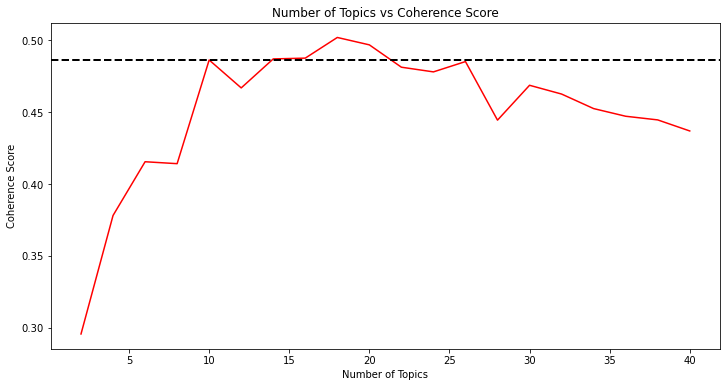

In [50]:
#Plot the number of topics vs coherence score
x_ax = range(2, 41, 2)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.486, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Number of Topics vs Coherence Score')
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
plt.show()

As seen in the above plot, the coherence score increases rapidly till 10 topics (coherence score = 0.486) and then starts to follow almost a horizontal trajectory, achieved the highest score at 18 topics(coherence_score=0.502). 
Therefore for this corpus 10 topics and 18 topics seem like potential good options.

In [61]:
coherence_scores[4],coherence_scores[8]

(0.48621979220006856, 0.5018786669754478)

In [62]:
#save the lda_model with 10 topics
lda_10 = lda_models[4]
lda_18=lda_models[8]
lda_10.save('lda_10')
lda_18.save('lda_18')

2023-02-27 16:44:02,763 : INFO : LdaState lifecycle event {'fname_or_handle': 'lda_10.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-02-27T16:44:02.762857', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'saving'}
2023-02-27 16:44:02,765 : INFO : saved lda_10.state
2023-02-27 16:44:02,776 : INFO : LdaMulticore lifecycle event {'fname_or_handle': 'lda_10', 'separately': "['expElogbeta', 'sstats']", 'sep_limit': 10485760, 'ignore': ['state', 'dispatcher', 'id2word'], 'datetime': '2023-02-27T16:44:02.776727', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'saving'}
2023-02-27 16:44:02,777 : INFO : storing np array 'expElogbeta' to lda_10.expElogbeta.npy
2023-02-27 16:44:02,779 : INFO : not storing attribute state
2023-02-27 16:44:02,779 : INFO : 

In [63]:
import pickle
#save the model
pickle.dump(lda_10, open('ldamodel_t10.pkl', 'wb'))
pickle.dump(lda_18, open('ldaModel_t18.pkl', 'wb'))

In [77]:
#load model
lda_10 = LdaModel.load('LDA_MODEL/lda_10')

In [78]:
vis_data_10 = pyLDAvis.gensim.prepare(lda_10, corpus, dictionary)

D:\software\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [85]:
vis_data_18 = pyLDAvis.gensim.prepare(lda_18, corpus, dictionary)

D:\software\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [114]:
pyLDAvis.display(vis_data_10)

In [86]:
pyLDAvis.display(vis_data_18)

In 18 topics, many topics are actually overlapped with each other, thus 10 topics LDA model was chosen for further interpretation of the topic names. 

### Optimal Iteration

In [41]:
#Iterate LdaMulticore model over varing passes
def model_coherence_generator_2(corpus, dictionary, data, passes):
    ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, passes=passes, workers=10, random_state=42)
    cv_coherence_model = CoherenceModel(model=ldamodel, corpus = corpus, coherence='c_v', texts=data)
    score = cv_coherence_model.get_coherence()
    return ldamodel, score

#models = []
#coherence_scores = []
for passes in tqdm([1, 5, 10, 20, 40, 60, 80, 100]):
    model, score = model_coherence_generator_2(corpus, dictionary, df['Tokens'], passes)
    models.append(model)
    coherence_scores.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [33:38<00:00, 2018.38s/it]


In [71]:
coherence_scores

[0.35615270842476654,
 0.4501174224234517,
 0.464733110474457,
 0.46918701431023235,
 0.47237584246599207,
 0.47387202498558506,
 0.4699180781373288,
 0.473581311212426]

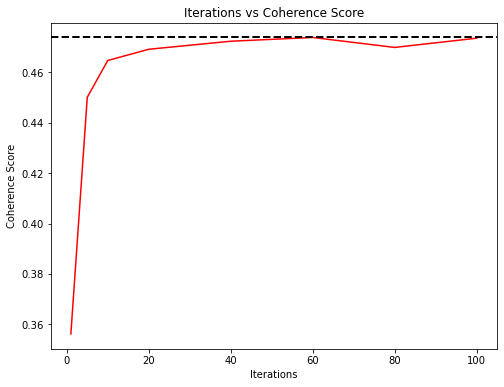

In [69]:
#Plot the iteration times vs coherence score
x_ax = [1, 5, 10, 20, 40, 60, 80, 100]
y_ax = coherence_scores
plt.figure(figsize=(8, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y= 0.474, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Iterations vs Coherence Score')
xl = plt.xlabel('Iterations')
yl = plt.ylabel('Coherence Score')
plt.show()

Based on the plot, the coherence score increases rapidly with passes increases and achieved the highest score with passes=60. 
Therefore, for the further topics extration, we will run LDA with topic_numbers=10, passes=60.

In [72]:
lda_t10_p60 = models[6]

In [108]:
lda_10_60 = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, passes=60, workers=20)
cv_coherence_model = CoherenceModel(model=lda_10_60, corpus = corpus, coherence='c_v', texts=df["Tokens"])
score = cv_coherence_model.get_coherence()
print(score)

0.48034246939196856


In [109]:
lda_10_60.save('lda_10_p60')

In [109]:
import pickle

In [111]:
lda_10_60 = LdaModel.load('D:/DATA_SCIENCE/Project/CHATGPT/LDA_MODEL/lda_10_p60')

In [127]:
pprint(lda_10_60.show_topics())

[(0,
  '0.028*"use" + 0.017*"build" + 0.016*"free" + 0.014*"make" + 0.011*"pay" + '
  '0.010*"app" + 0.010*"user" + 0.010*"openai" + 0.010*"version" + '
  '0.009*"open"'),
 (1,
  '0.108*"write" + 0.049*"use" + 0.036*"ask" + 0.025*"content" + '
  '0.022*"prompt" + 0.019*"generate" + 0.019*"create" + 0.014*"thread" + '
  '0.013*"article" + 0.013*"tweet"'),
 (2,
  '0.014*"ask" + 0.012*"love" + 0.011*"talk" + 0.010*"game" + 0.008*"play" + '
  '0.008*"new" + 0.007*"story" + 0.007*"world" + 0.007*"friend" + 0.007*"let"'),
 (3,
  '0.092*"google" + 0.066*"openai" + 0.035*"search" + 0.030*"microsoft" + '
  '0.028*"chatbot" + 0.021*"gpt" + 0.017*"openais" + 0.013*"via" + 0.013*"new" '
  '+ 0.012*"company"'),
 (4,
  '0.025*"ask" + 0.024*"like" + 0.020*"know" + 0.020*"answer" + 0.017*"think" '
  '+ 0.017*"say" + 0.017*"question" + 0.013*"make" + 0.013*"would" + '
  '0.012*"get"'),
 (5,
  '0.042*"year" + 0.027*"next" + 0.024*"day" + 0.021*"week" + 0.020*"take" + '
  '0.019*"time" + 0.016*"last" + 0

In [82]:
pprint(lda_10.show_topics())

[(0,
  '0.061*"use" + 0.042*"code" + 0.024*"write" + 0.012*"help" + 0.012*"prompt" '
  '+ 0.011*"create" + 0.011*"build" + 0.011*"video" + 0.009*"learn" + '
  '0.009*"cod"'),
 (1,
  '0.022*"day" + 0.019*"twitter" + 0.015*"year" + 0.013*"week" + 0.013*"free" '
  '+ 0.012*"get" + 0.011*"last" + 0.010*"time" + 0.009*"take" + 0.009*"pay"'),
 (2,
  '0.042*"openai" + 0.026*"new" + 0.024*"technology" + 0.023*"tech" + '
  '0.020*"chatbot" + 0.017*"future" + 0.015*"via" + 0.013*"world" + '
  '0.013*"change" + 0.012*"artificial_intelligence"'),
 (3,
  '0.037*"use" + 0.031*"content" + 0.027*"generate" + 0.026*"create" + '
  '0.021*"tool" + 0.017*"text" + 0.016*"write" + 0.016*"make" + 0.013*"help" + '
  '0.012*"idea"'),
 (4,
  '0.022*"like" + 0.018*"think" + 0.018*"get" + 0.017*"know" + 0.017*"good" + '
  '0.017*"use" + 0.016*"thing" + 0.013*"people" + 0.012*"dont" + 0.012*"try"'),
 (5,
  '0.111*"google" + 0.042*"search" + 0.013*"search_engine" + 0.012*"microsoft" '
  '+ 0.011*"replace" + 0.010*"

In [119]:
vis_data_10_60 = pyLDAvis.gensim.prepare(lda_10_60, corpus, dictionary)

D:\software\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [128]:
pyLDAvis.display(vis_data_10_60)

# Identification of Topics

In [121]:
#get the topic distribution for each tweets
topic_dist = [lda_10_60[doc] for doc in corpus]

In [122]:
#get the dominant topic and the score
dominant_topic = [max(topic, key=lambda x:x[1])[0] for topic in topic_dist]
scores =[max(topic, key=lambda x:x[1])[1] for topic in topic_dist]

In [126]:
#Create a dataframe to show dominant topic for each tweet
df_topic = df[['Tweet','Tokens','Date']].copy()
df_topic['Dominant_Topic'] = [topic+1 for topic in dominant_topic]
df_topic['Contribution%'] = [round(score*100,2) for score in scores]
df_topic.head()

,Tweet,Tokens,Date,Dominant_Topic,Contribution%
0,ChatGPT is basically the best unpaid intern to...,"[chatgpt, basically, best, unpaid, intern, eve...",2023-01-30,8,87.12
1,@jeffersonmorley @ChatGPT @OpenAI It pulled th...,"[pull, though]",2023-01-30,5,69.99
2,#ChatGPT is down for me since yesterday. Is it...,"[chatgpt, since, yesterday]",2023-01-30,8,69.99
3,@GalorOded ChatGPT is literally the marriage o...,"[chatgpt, literally, marriage, madlibs, monte,...",2023-01-30,6,26.25
4,ChatGPT Is Making Universities Rethink Plagiar...,"[chatgpt, make, university, rethink, plagiaris...",2023-01-30,9,63.12


In [148]:
# Count and percentage of tweets for each topic
df_topic_summary = df_topic.groupby('Dominant_Topic').agg({'Tweet':'count'}).copy().reset_index()
df_topic_summary.rename(columns={'Tweet':'Total_tweet'}, inplace=True)
df_topic_summary['Percentage%'] = round(df_topic_summary['Total_tweet']/df_topic.shape[0]*100,2)
df_topic_summary=df_topic_summary.sort_values('Total_tweet', ascending=False).reset_index(drop=True)
df_topic_summary

,Dominant_Topic,Total_tweet,Percentage%
0,8,154146,18.51
1,5,148989,17.89
2,1,98785,11.86
3,2,88008,10.57
4,10,86441,10.38
5,7,71654,8.60
6,4,55814,6.70
7,3,54211,6.51
8,9,44713,5.37
9,6,30163,3.62


In [140]:
#To sort the highly relevant tweets for each topics and interprete the topic names.
df_topic[df_topic['Dominant_Topic']==2].sort_values('Contribution%', ascending=False)[0:100]

,Tweet,Tokens,Date,Dominant_Topic,Contribution%,Topic_Name
324145,3. Use ChatGPT to create twitter thread outlin...,"['use', 'chatgpt', 'create', 'twitter', 'threa...",2023-01-13,2,96.40,T2 Content and Ideas Generation
631017,7. Create drafts of email newsletters and mark...,"['create', 'draft', 'email', 'newsletter', 'ma...",2022-12-14,2,96.25,T2 Content and Ideas Generation
47732,4/ #ChatGPT can also be used to generate email...,"['chatgpt', 'also', 'use', 'generate', 'email'...",2023-01-29,2,96.25,T2 Content and Ideas Generation
56274,4/ #ChatGPT can also be used to generate email...,"['chatgpt', 'also', 'use', 'generate', 'email'...",2023-01-29,2,96.25,T2 Content and Ideas Generation
448215,Let's make a quick recap \n8 businesses you ca...,"['let', 'make', 'quick', 'recap', 'business', ...",2023-01-06,2,96.25,T2 Content and Ideas Generation
478175,20. Amazon Product Descriptions\n\nChatGPT Pro...,"['amazon', 'product', 'description', 'chatgpt'...",2023-01-04,2,96.25,T2 Content and Ideas Generation
527975,5 / 5: Another interesting use case for ChatGP...,"['another', 'interesting', 'use', 'case', 'cha...",2022-12-28,2,96.25,T2 Content and Ideas Generation
718613,1. Draft writing and editing\n\nChatGPT can al...,"['draft', 'write', 'edit', 'chatgpt', 'also', ...",2022-12-08,2,96.09,T2 Content and Ideas Generation
409836,3. Writing Emails\n\nYou can have ChatGPT spin...,"['write', 'email', 'chatgpt', 'spin', 'specifi...",2023-01-09,2,96.08,T2 Content and Ideas Generation
156793,7. Use ChatGPT to create outline structures fo...,"['use', 'chatgpt', 'create', 'outline', 'struc...",2023-01-24,2,96.08,T2 Content and Ideas Generation


In [138]:
#Summarize the topic names based on each topics' top terms and highly-relevant tweets 
names = {1:"T1 ChatGPT's Cost and Access",
        2:"T2 Content and Ideas Generation",
        3:"T3 Entertainment and Activities",
        4:"T4 Competition of AI Giants",
        5:"T5 ChatGTP's Issues and Reliability",
        6:"T6 Developments and Milestones of ChatGPT",
        7:"T7 Impacts on Future Business and Industry",
        8:"T8 Impacts on Work and Efficiency",
        9:"T9 Impacts on Education and Academy",
        10:"T10 Natural Language Processing"
        }

In [143]:
df_topic['Topic_Name'] = df_topic['Dominant_Topic'].map(names)
df_topic.to_csv('Twitter_topics.csv', index=False)

In [144]:
#creat a topic dataframe
topics = [[(term, round(weight,3)) for term, weight in lda_10_60.show_topic(n,topn=20)] for n in range(0,lda_10_60.num_topics)]

In [146]:
pd.set_option('display.max_colwidth', None)
topic_df = pd.DataFrame({'Topic_Name':names.values(), 
                         'Topic_Terms':[','.join([term for term, weight in topic]) for topic in topics]},
                        index = ['Topic ' + str(n) for n in range(1,lda_10_60.num_topics+1)])
# apply style to align content to the left
topic_df

,Topic_Name,Topic_Terms
Topic 1,T1 ChatGPT's Cost and Access,"use,build,free,make,pay,app,user,openai,version,open,run,money,get,access,api,twitter,like,chat,bot,create"
Topic 2,T2 Content and Ideas Generation,"write,use,ask,content,prompt,generate,create,thread,article,tweet,help,idea,video,story,make,script,code,book,read,get"
Topic 3,T3 Entertainment and Activities,"ask,love,talk,game,play,new,story,world,friend,let,amp,live,bitcoin,whats,thanks,poem,conversation,today,name,best"
Topic 4,T4 Competition of AI Giants,"google,openai,search,microsoft,chatbot,gpt,openais,via,new,company,billion,search_engine,launch,bing,say,news,creator,could,tech,investment"
Topic 5,T5 ChatGTP's Issues and Reliability,"ask,like,know,answer,think,say,question,make,would,get,dont,people,give,even,tell,doesnt,one,good,thing,wrong"
Topic 6,T6 Developments and Milestones of ChatGPT,"year,next,day,week,take,time,last,text,image,dalle,one,first,paper,month,old,art,two,midjourney,ago,release"
Topic 7,T7 Impacts on Future Business and Industry,"future,technology,tech,world,new,change,amp,tool,via,business,way,potential,like,web,openai,artificial_intelligence,machinelearning,learn,job,industry"
Topic 8,T8 Impacts on Work and Efficiency,"use,get,try,good,work,code,thing,ive,see,time,like,think,really,well,people,job,make,need,lot,much"
Topic 9,T9 Impacts on Education and Academy,"student,use,education,school,essay,teacher,teach,ban,exam,new,pass,cheat,learn,tool,kid,law,via,concern,college,assignment"
Topic 10,T10 Natural Language Processing,"model,use,data,language,question,answer,human,train,information,provide,response,text,generate,conversation,gpt,give,understand,base,also,like"


In [149]:
df_temp = df_topic_summary.sort_values('Dominant_Topic')
topic_df['Tweet_count'] = df_temp['Total_tweet'].values
topic_df

,Topic_Name,Topic_Terms,Tweet_count
Topic 1,T1 ChatGPT's Cost and Access,"use,build,free,make,pay,app,user,openai,version,open,run,money,get,access,api,twitter,like,chat,bot,create",98785
Topic 2,T2 Content and Ideas Generation,"write,use,ask,content,prompt,generate,create,thread,article,tweet,help,idea,video,story,make,script,code,book,read,get",88008
Topic 3,T3 Entertainment and Activities,"ask,love,talk,game,play,new,story,world,friend,let,amp,live,bitcoin,whats,thanks,poem,conversation,today,name,best",54211
Topic 4,T4 Competition of AI Giants,"google,openai,search,microsoft,chatbot,gpt,openais,via,new,company,billion,search_engine,launch,bing,say,news,creator,could,tech,investment",55814
Topic 5,T5 ChatGTP's Issues and Reliability,"ask,like,know,answer,think,say,question,make,would,get,dont,people,give,even,tell,doesnt,one,good,thing,wrong",148989
Topic 6,T6 Developments and Milestones of ChatGPT,"year,next,day,week,take,time,last,text,image,dalle,one,first,paper,month,old,art,two,midjourney,ago,release",30163
Topic 7,T7 Impacts on Future Business and Industry,"future,technology,tech,world,new,change,amp,tool,via,business,way,potential,like,web,openai,artificial_intelligence,machinelearning,learn,job,industry",71654
Topic 8,T8 Impacts on Work and Efficiency,"use,get,try,good,work,code,thing,ive,see,time,like,think,really,well,people,job,make,need,lot,much",154146
Topic 9,T9 Impacts on Education and Academy,"student,use,education,school,essay,teacher,teach,ban,exam,new,pass,cheat,learn,tool,kid,law,via,concern,college,assignment",44713
Topic 10,T10 Natural Language Processing,"model,use,data,language,question,answer,human,train,information,provide,response,text,generate,conversation,gpt,give,understand,base,also,like",86441


D:\software\Anaconda\lib\site-packages\seaborn\palettes.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(name)


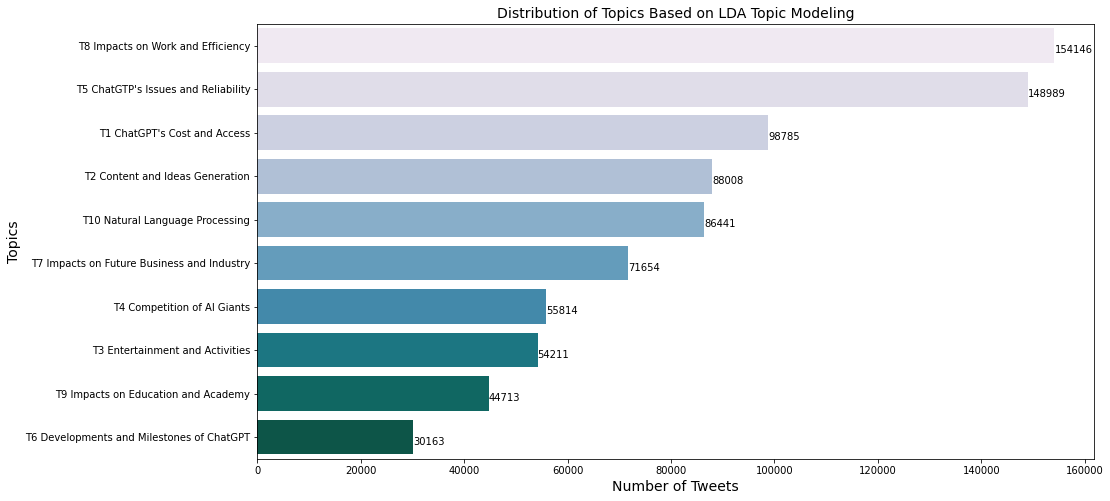

In [152]:
#plot a bar chart to show the number of tweets for each topic
sort_name = topic_df.sort_values('Tweet_count',ascending=False)['Topic_Name'].to_list()
fig,ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.barplot(y=topic_df['Topic_Name'], x=topic_df['Tweet_count'], order=sort_name, palette='PuBuGn')
for i in ax.patches:
    ax.annotate(int(i.get_width()), (i.get_width(), i.get_y()+0.5), va='center')
ax.set_ylabel('Topics', size=14)
ax.set_xlabel('Number of Tweets', size=14)
ax.set_title('Distribution of Topics Based on LDA Topic Modeling', size=14)

plt.show()

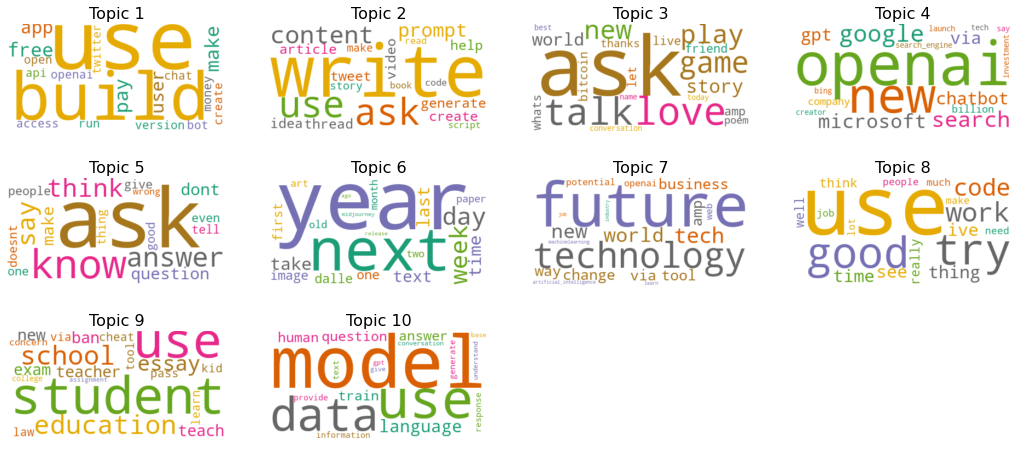

In [288]:
# word cloud
from wordcloud import WordCloud
wc = WordCloud(background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
fig, axs = plt.subplots(3,4, figsize=(18,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    if i<10:
        wc.generate(topic_df['Topic_Terms'][i])
        plt.subplot(3,4,i+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.title(topic_df.index[i], size=16)
    plt.axis('off')

plt.show()
